<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting - ADA</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Building LSTM Model</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Get Best Parameters for LSTM</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Run the LSTM Model and Get Predictions</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Recursive Predictions</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>ARIMA</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [14]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_ADA.csv')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1821,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1822,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1823,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1824,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   ADA-USD_ADJCLOSE  1629 non-null   float64
 2   ADA-USD_CLOSE     1629 non-null   float64
 3   ADA-USD_HIGH      1629 non-null   float64
 4   ADA-USD_LOW       1629 non-null   float64
 5   ADA-USD_OPEN      1629 non-null   float64
 6   ADA-USD_VOLUME    1629 non-null   float64
dtypes: float64(6), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
ADA-USD_ADJCLOSE,197
ADA-USD_CLOSE,197
ADA-USD_HIGH,197
ADA-USD_LOW,197
ADA-USD_OPEN,197
ADA-USD_VOLUME,197


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ADA-USD_ADJCLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_CLOSE,1629.0,4.955610e-01,6.687141e-01,2.396100e-02,5.498100e-02,1.198830e-01,9.174660e-01,2.968239e+00
ADA-USD_HIGH,1629.0,5.172446e-01,6.969798e-01,2.599300e-02,5.692600e-02,1.256630e-01,9.569040e-01,3.099186e+00
ADA-USD_LOW,1629.0,4.713412e-01,6.385373e-01,1.913000e-02,5.236800e-02,1.138860e-01,8.777360e-01,2.907606e+00
ADA-USD_OPEN,1629.0,4.950231e-01,6.686581e-01,2.395400e-02,5.422400e-02,1.193970e-01,9.175090e-01,2.966390e+00
ADA-USD_VOLUME,1629.0,1.204915e+09,2.182599e+09,2.930550e+06,6.533307e+07,1.959541e+08,1.385060e+09,1.914198e+10


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
69,2017-07-04,NaN,NaN,NaN,NaN,NaN,NaN
1540,2021-07-14,1.262258,1.262258,1.287538,1.200443,1.264938,1.647062e+09
653,2019-02-08,0.040751,0.040751,0.041207,0.036228,0.036399,3.270521e+07
1292,2020-11-08,0.106621,0.106621,0.108298,0.100179,0.101379,6.257871e+08
833,2019-08-07,0.051906,0.051906,0.054075,0.051444,0.053374,4.629031e+07
330,2018-03-22,0.203481,0.203481,0.221969,0.192132,0.215403,2.015400e+08
196,2017-11-08,NaN,NaN,NaN,NaN,NaN,NaN
1476,2021-05-11,1.764077,1.764077,1.778112,1.596676,1.641717,5.428572e+09
145,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN
1408,2021-03-04,1.114868,1.114868,1.229674,1.069218,1.216445,7.164490e+09


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-04-26,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-04-27,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-04-28,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-04-29,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
192,2017-11-04,NaN,NaN,NaN,NaN,NaN,NaN
193,2017-11-05,NaN,NaN,NaN,NaN,NaN,NaN
194,2017-11-06,NaN,NaN,NaN,NaN,NaN,NaN
195,2017-11-07,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06
...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,18716200.0,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6766780.0,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5532220.0,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7280250.0,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4419440.0,5.595160,11.938711


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

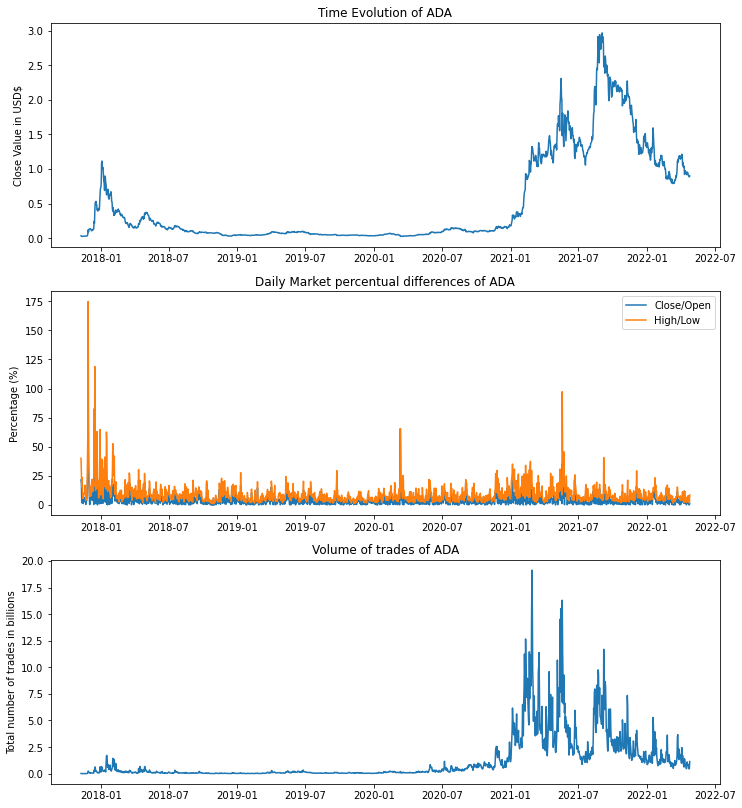

In [13]:
coin_name = plot_coinValue(df)

In [18]:
import yfinance as yf
df = yf.Ticker('ADA-USD').history(period='5y')[['Close']]
df['Date'] = df.index
df.reset_index(drop=True, inplace=True)
df

,Close,Date
0,0.032053,2017-11-09
1,0.027119,2017-11-10
2,0.027437,2017-11-11
3,0.023977,2017-11-12
4,0.025808,2017-11-13
...,...,...
1658,0.513877,2022-05-25
1659,0.480883,2022-05-26
1660,0.455507,2022-05-27
1661,0.455911,2022-05-28


In [20]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df.reset_index(drop=True, inplace=True)
df

,Close,Date
0,1.950002,2021-11-01
1,1.971377,2021-11-02
2,2.063701,2021-11-03
3,1.984882,2021-11-04
4,1.986206,2021-11-05
...,...,...
205,0.513877,2022-05-25
206,0.480883,2022-05-26
207,0.455507,2022-05-27
208,0.455911,2022-05-28


In [8]:
df_complete = df.copy(deep=True)
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

TypeError: '>=' not supported between instances of 'datetime.date' and 'str'

# Modelling


## <font color='#5D6D7E'>Building LSTM Model</font> <a class="anchor" id="twentysecond-bullet"></a>
  [Back to TOC](#toc)

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [23]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,0]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,0]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [24]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,1.950002,2.124419,2021-11-08
1,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,1.971377,2.273483,2021-11-09
2,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.063701,2.101802,2021-11-10
3,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,1.984882,2.085524,2021-11-11
4,2.085524,2.101802,2.273483,2.124419,2.021872,2.006609,1.986206,2.045766,2021-11-12
...,...,...,...,...,...,...,...,...,...
198,0.521224,0.512605,0.542618,0.528314,0.517907,0.533321,0.505615,0.513877,2022-05-25
199,0.513877,0.521224,0.512605,0.542618,0.528314,0.517907,0.533321,0.480883,2022-05-26
200,0.480883,0.513877,0.521224,0.512605,0.542618,0.528314,0.517907,0.455507,2022-05-27
201,0.455507,0.480883,0.513877,0.521224,0.512605,0.542618,0.528314,0.455911,2022-05-28


In [25]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((203,), (203, 7, 1), (203,))

NameError: name 'coin_name' is not defined

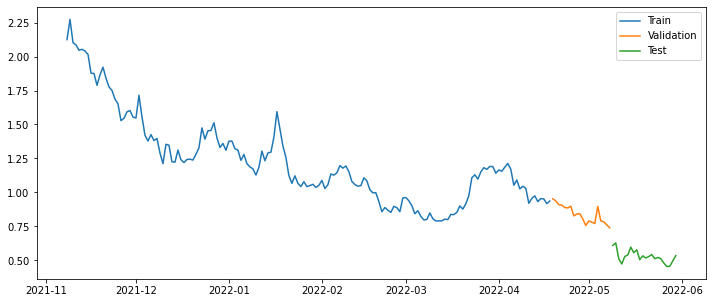

In [26]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

## <font color='#5D6D7E'>Get Best Parameters for LSTM</font> <a class="anchor" id="twentythird-bullet"></a>
  [Back to TOC](#toc)

In [19]:
#!pip install tensorflow

In [19]:
# import os
# os.environ['PYTHONHASHSEED']= '0'
# import numpy as np
# np.random.seed(1)
# import random as rn
# rn.seed(1)
# import tensorflow as tf
# tf.random.set_seed(1)

# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers
# from sklearn.metrics import mean_squared_error

# # Function to create LSTM model and compute the MSE value for the given parameters
# def check_model(X_train, y_train, X_val, y_val, X_test, y_test, learning_rate,epoch,batch):
    
#     # create model
#     model = Sequential([layers.Input((7, 1)),
#                         layers.LSTM(64),
#                         layers.Dense(32, activation='relu'),
#                         layers.Dense(32, activation='relu'),
#                         layers.Dense(1)])
#     # Compile model
#     model.compile(loss='mse', optimizer=Adam(learning_rate=learning_rate), metrics=['mean_absolute_error'])
    
#     model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epoch, shuffle=False, batch_size=batch, verbose=2)
    
#     test_predictions = model.predict(X_test).flatten()
    
#     LSTM_mse = mean_squared_error(y_test, test_predictions)
    
#     return LSTM_mse

# #Function that iterates the different parameters and gets the ones corresponding to the lowest MSE score.
# def search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test):
    
#     best_score = float('inf')
    
#     for b in batch_size:
#         for e in epochs:
#             for l in learn_rate:
#                 print('Batch Size: ' + str(b))
#                 print('Number of Epochs: ' + str(e))
#                 print('Value of Learning Rate: ' + str(l))
#                 try:
#                     mse = check_model(X_train, y_train, X_val, y_val, X_test, y_test,l,e,b)
#                     print('MSE=%.3f' % (mse))
#                     if mse < best_score:
#                         best_score = mse
#                         top_params = [b, e, l]
#                 except:
#                     continue
                    
#     print('Best MSE=%.3f' % (best_score))
#     print('Optimal Batch Size: ' + str(top_params[0]))
#     print('Optimal Number of Epochs: ' + str(top_params[1]))
#     print('Optimal Value of Learning Rate: ' + str(top_params[2]))
                        

# # define parameters
# batch_size = [10, 100, 1000]
# epochs = [50, 100]
# learn_rate = np.linspace(0.001,0.1, num=10)

# warnings.filterwarnings("ignore")
# search_parameters(batch_size, epochs, learn_rate, X_train, y_train, X_val, y_val, X_test, y_test)

Batch Size: 10
Number of Epochs: 50
Value of Learning Rate: 0.001
Epoch 1/50
14/14 - 8s - loss: 1.7913 - mean_absolute_error: 1.2632 - val_loss: 1.0220 - val_mean_absolute_error: 1.0097 - 8s/epoch - 566ms/step
Epoch 2/50
14/14 - 0s - loss: 1.1422 - mean_absolute_error: 0.9974 - val_loss: 0.5020 - val_mean_absolute_error: 0.7066 - 390ms/epoch - 28ms/step
Epoch 3/50
14/14 - 0s - loss: 0.4291 - mean_absolute_error: 0.5087 - val_loss: 0.0115 - val_mean_absolute_error: 0.0870 - 400ms/epoch - 29ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0716 - mean_absolute_error: 0.2446 - val_loss: 0.0054 - val_mean_absolute_error: 0.0609 - 398ms/epoch - 28ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0364 - mean_absolute_error: 0.1382 - val_loss: 0.0062 - val_mean_absolute_error: 0.0662 - 394ms/epoch - 28ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0395 - mean_absolute_error: 0.1568 - val_loss: 0.0059 - val_mean_absolute_error: 0.0598 - 408ms/epoch - 29ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0239 - mean_absolute_error: 

Epoch 6/50
14/14 - 0s - loss: 0.0709 - mean_absolute_error: 0.2104 - val_loss: 0.0263 - val_mean_absolute_error: 0.1450 - 409ms/epoch - 29ms/step
Epoch 7/50
14/14 - 1s - loss: 0.0450 - mean_absolute_error: 0.1565 - val_loss: 0.0702 - val_mean_absolute_error: 0.2497 - 519ms/epoch - 37ms/step
Epoch 8/50
14/14 - 1s - loss: 0.0442 - mean_absolute_error: 0.1562 - val_loss: 0.0743 - val_mean_absolute_error: 0.2574 - 618ms/epoch - 44ms/step
Epoch 9/50
14/14 - 1s - loss: 0.0294 - mean_absolute_error: 0.1249 - val_loss: 0.0513 - val_mean_absolute_error: 0.2115 - 764ms/epoch - 55ms/step
Epoch 10/50
14/14 - 1s - loss: 0.0248 - mean_absolute_error: 0.1143 - val_loss: 0.0619 - val_mean_absolute_error: 0.2406 - 762ms/epoch - 54ms/step
Epoch 11/50
14/14 - 1s - loss: 0.0244 - mean_absolute_error: 0.1220 - val_loss: 0.0524 - val_mean_absolute_error: 0.2015 - 583ms/epoch - 42ms/step
Epoch 12/50
14/14 - 1s - loss: 0.0324 - mean_absolute_error: 0.1466 - val_loss: 0.0228 - val_mean_absolute_error: 0.1265 -

Epoch 12/50
14/14 - 0s - loss: 0.0156 - mean_absolute_error: 0.0959 - val_loss: 0.0574 - val_mean_absolute_error: 0.2276 - 372ms/epoch - 27ms/step
Epoch 13/50
14/14 - 0s - loss: 0.0241 - mean_absolute_error: 0.1125 - val_loss: 0.0449 - val_mean_absolute_error: 0.1884 - 438ms/epoch - 31ms/step
Epoch 14/50
14/14 - 0s - loss: 0.0248 - mean_absolute_error: 0.1255 - val_loss: 0.0234 - val_mean_absolute_error: 0.1321 - 463ms/epoch - 33ms/step
Epoch 15/50
14/14 - 1s - loss: 0.0161 - mean_absolute_error: 0.0946 - val_loss: 0.0237 - val_mean_absolute_error: 0.1245 - 595ms/epoch - 42ms/step
Epoch 16/50
14/14 - 0s - loss: 0.0225 - mean_absolute_error: 0.1203 - val_loss: 0.0136 - val_mean_absolute_error: 0.0932 - 484ms/epoch - 35ms/step
Epoch 17/50
14/14 - 1s - loss: 0.0145 - mean_absolute_error: 0.0891 - val_loss: 0.0214 - val_mean_absolute_error: 0.1214 - 674ms/epoch - 48ms/step
Epoch 18/50
14/14 - 1s - loss: 0.0149 - mean_absolute_error: 0.0956 - val_loss: 0.0180 - val_mean_absolute_error: 0.11

Epoch 18/50
14/14 - 0s - loss: 0.2650 - mean_absolute_error: 0.4265 - val_loss: 0.0183 - val_mean_absolute_error: 0.1251 - 185ms/epoch - 13ms/step
Epoch 19/50
14/14 - 0s - loss: 0.1911 - mean_absolute_error: 0.3605 - val_loss: 0.0034 - val_mean_absolute_error: 0.0397 - 238ms/epoch - 17ms/step
Epoch 20/50
14/14 - 0s - loss: 0.1181 - mean_absolute_error: 0.2761 - val_loss: 0.0152 - val_mean_absolute_error: 0.1135 - 387ms/epoch - 28ms/step
Epoch 21/50
14/14 - 0s - loss: 0.1433 - mean_absolute_error: 0.3098 - val_loss: 0.0093 - val_mean_absolute_error: 0.0890 - 176ms/epoch - 13ms/step
Epoch 22/50
14/14 - 0s - loss: 0.0996 - mean_absolute_error: 0.2506 - val_loss: 0.0201 - val_mean_absolute_error: 0.1327 - 151ms/epoch - 11ms/step
Epoch 23/50
14/14 - 0s - loss: 0.0889 - mean_absolute_error: 0.2368 - val_loss: 0.0456 - val_mean_absolute_error: 0.2076 - 355ms/epoch - 25ms/step
Epoch 24/50
14/14 - 0s - loss: 0.0971 - mean_absolute_error: 0.2420 - val_loss: 0.0866 - val_mean_absolute_error: 0.28

Epoch 24/50
14/14 - 0s - loss: 0.1447 - mean_absolute_error: 0.3043 - val_loss: 0.0044 - val_mean_absolute_error: 0.0474 - 430ms/epoch - 31ms/step
Epoch 25/50
14/14 - 0s - loss: 0.1448 - mean_absolute_error: 0.3044 - val_loss: 0.0043 - val_mean_absolute_error: 0.0473 - 448ms/epoch - 32ms/step
Epoch 26/50
14/14 - 0s - loss: 0.1449 - mean_absolute_error: 0.3045 - val_loss: 0.0043 - val_mean_absolute_error: 0.0473 - 426ms/epoch - 30ms/step
Epoch 27/50
14/14 - 0s - loss: 0.1450 - mean_absolute_error: 0.3046 - val_loss: 0.0043 - val_mean_absolute_error: 0.0472 - 331ms/epoch - 24ms/step
Epoch 28/50
14/14 - 0s - loss: 0.1450 - mean_absolute_error: 0.3046 - val_loss: 0.0043 - val_mean_absolute_error: 0.0472 - 382ms/epoch - 27ms/step
Epoch 29/50
14/14 - 0s - loss: 0.1450 - mean_absolute_error: 0.3047 - val_loss: 0.0043 - val_mean_absolute_error: 0.0471 - 388ms/epoch - 28ms/step
Epoch 30/50
14/14 - 0s - loss: 0.1451 - mean_absolute_error: 0.3047 - val_loss: 0.0043 - val_mean_absolute_error: 0.04

Epoch 25/50
14/14 - 0s - loss: 0.1355 - mean_absolute_error: 0.2914 - val_loss: 0.0062 - val_mean_absolute_error: 0.0617 - 186ms/epoch - 13ms/step
Epoch 26/50
14/14 - 0s - loss: 0.1347 - mean_absolute_error: 0.2903 - val_loss: 0.0065 - val_mean_absolute_error: 0.0636 - 145ms/epoch - 10ms/step
Epoch 27/50
14/14 - 0s - loss: 0.1340 - mean_absolute_error: 0.2893 - val_loss: 0.0067 - val_mean_absolute_error: 0.0653 - 162ms/epoch - 12ms/step
Epoch 28/50
14/14 - 0s - loss: 0.1333 - mean_absolute_error: 0.2885 - val_loss: 0.0069 - val_mean_absolute_error: 0.0669 - 161ms/epoch - 12ms/step
Epoch 29/50
14/14 - 0s - loss: 0.1328 - mean_absolute_error: 0.2877 - val_loss: 0.0071 - val_mean_absolute_error: 0.0682 - 163ms/epoch - 12ms/step
Epoch 30/50
14/14 - 0s - loss: 0.1323 - mean_absolute_error: 0.2871 - val_loss: 0.0073 - val_mean_absolute_error: 0.0694 - 139ms/epoch - 10ms/step
Epoch 31/50
14/14 - 0s - loss: 0.1319 - mean_absolute_error: 0.2866 - val_loss: 0.0075 - val_mean_absolute_error: 0.07

Epoch 26/50
14/14 - 1s - loss: 0.1422 - mean_absolute_error: 0.3008 - val_loss: 0.0049 - val_mean_absolute_error: 0.0516 - 691ms/epoch - 49ms/step
Epoch 27/50
14/14 - 0s - loss: 0.1423 - mean_absolute_error: 0.3009 - val_loss: 0.0049 - val_mean_absolute_error: 0.0515 - 440ms/epoch - 31ms/step
Epoch 28/50
14/14 - 0s - loss: 0.1423 - mean_absolute_error: 0.3009 - val_loss: 0.0049 - val_mean_absolute_error: 0.0515 - 311ms/epoch - 22ms/step
Epoch 29/50
14/14 - 0s - loss: 0.1423 - mean_absolute_error: 0.3009 - val_loss: 0.0049 - val_mean_absolute_error: 0.0515 - 347ms/epoch - 25ms/step
Epoch 30/50
14/14 - 0s - loss: 0.1423 - mean_absolute_error: 0.3009 - val_loss: 0.0049 - val_mean_absolute_error: 0.0515 - 324ms/epoch - 23ms/step
Epoch 31/50
14/14 - 0s - loss: 0.1422 - mean_absolute_error: 0.3009 - val_loss: 0.0049 - val_mean_absolute_error: 0.0516 - 286ms/epoch - 20ms/step
Epoch 32/50
14/14 - 1s - loss: 0.1422 - mean_absolute_error: 0.3008 - val_loss: 0.0049 - val_mean_absolute_error: 0.05

Epoch 32/50
14/14 - 0s - loss: 0.0144 - mean_absolute_error: 0.0945 - val_loss: 0.0084 - val_mean_absolute_error: 0.0755 - 238ms/epoch - 17ms/step
Epoch 33/50
14/14 - 0s - loss: 0.0165 - mean_absolute_error: 0.0990 - val_loss: 0.0441 - val_mean_absolute_error: 0.1912 - 291ms/epoch - 21ms/step
Epoch 34/50
14/14 - 0s - loss: 0.0409 - mean_absolute_error: 0.1447 - val_loss: 0.0688 - val_mean_absolute_error: 0.2576 - 244ms/epoch - 17ms/step
Epoch 35/50
14/14 - 0s - loss: 0.0251 - mean_absolute_error: 0.1258 - val_loss: 0.0277 - val_mean_absolute_error: 0.1462 - 260ms/epoch - 19ms/step
Epoch 36/50
14/14 - 0s - loss: 0.0498 - mean_absolute_error: 0.1937 - val_loss: 0.0049 - val_mean_absolute_error: 0.0535 - 205ms/epoch - 15ms/step
Epoch 37/50
14/14 - 0s - loss: 0.0174 - mean_absolute_error: 0.0951 - val_loss: 0.0311 - val_mean_absolute_error: 0.1570 - 187ms/epoch - 13ms/step
Epoch 38/50
14/14 - 0s - loss: 0.0175 - mean_absolute_error: 0.0940 - val_loss: 0.0240 - val_mean_absolute_error: 0.13

Epoch 38/50
14/14 - 0s - loss: 0.1295 - mean_absolute_error: 0.2835 - val_loss: 0.0090 - val_mean_absolute_error: 0.0805 - 194ms/epoch - 14ms/step
Epoch 39/50
14/14 - 0s - loss: 0.1296 - mean_absolute_error: 0.2836 - val_loss: 0.0090 - val_mean_absolute_error: 0.0802 - 200ms/epoch - 14ms/step
Epoch 40/50
14/14 - 0s - loss: 0.1297 - mean_absolute_error: 0.2838 - val_loss: 0.0089 - val_mean_absolute_error: 0.0799 - 165ms/epoch - 12ms/step
Epoch 41/50
14/14 - 0s - loss: 0.1299 - mean_absolute_error: 0.2840 - val_loss: 0.0089 - val_mean_absolute_error: 0.0796 - 148ms/epoch - 11ms/step
Epoch 42/50
14/14 - 0s - loss: 0.1300 - mean_absolute_error: 0.2841 - val_loss: 0.0088 - val_mean_absolute_error: 0.0793 - 165ms/epoch - 12ms/step
Epoch 43/50
14/14 - 0s - loss: 0.1301 - mean_absolute_error: 0.2843 - val_loss: 0.0088 - val_mean_absolute_error: 0.0791 - 146ms/epoch - 10ms/step
Epoch 44/50
14/14 - 0s - loss: 0.1302 - mean_absolute_error: 0.2845 - val_loss: 0.0087 - val_mean_absolute_error: 0.07

Epoch 44/50
14/14 - 0s - loss: 0.1314 - mean_absolute_error: 0.2861 - val_loss: 0.0083 - val_mean_absolute_error: 0.0761 - 260ms/epoch - 19ms/step
Epoch 45/50
14/14 - 0s - loss: 0.1315 - mean_absolute_error: 0.2862 - val_loss: 0.0083 - val_mean_absolute_error: 0.0758 - 219ms/epoch - 16ms/step
Epoch 46/50
14/14 - 0s - loss: 0.1317 - mean_absolute_error: 0.2864 - val_loss: 0.0082 - val_mean_absolute_error: 0.0755 - 185ms/epoch - 13ms/step
Epoch 47/50
14/14 - 0s - loss: 0.1318 - mean_absolute_error: 0.2866 - val_loss: 0.0082 - val_mean_absolute_error: 0.0752 - 174ms/epoch - 12ms/step
Epoch 48/50
14/14 - 0s - loss: 0.1319 - mean_absolute_error: 0.2868 - val_loss: 0.0081 - val_mean_absolute_error: 0.0749 - 166ms/epoch - 12ms/step
Epoch 49/50
14/14 - 0s - loss: 0.1321 - mean_absolute_error: 0.2869 - val_loss: 0.0081 - val_mean_absolute_error: 0.0746 - 268ms/epoch - 19ms/step
Epoch 50/50
14/14 - 1s - loss: 0.1322 - mean_absolute_error: 0.2871 - val_loss: 0.0080 - val_mean_absolute_error: 0.07

Epoch 49/100
14/14 - 0s - loss: 0.0100 - mean_absolute_error: 0.0753 - val_loss: 0.0147 - val_mean_absolute_error: 0.1017 - 405ms/epoch - 29ms/step
Epoch 50/100
14/14 - 0s - loss: 0.0099 - mean_absolute_error: 0.0752 - val_loss: 0.0147 - val_mean_absolute_error: 0.1017 - 420ms/epoch - 30ms/step
Epoch 51/100
14/14 - 0s - loss: 0.0099 - mean_absolute_error: 0.0751 - val_loss: 0.0147 - val_mean_absolute_error: 0.1017 - 394ms/epoch - 28ms/step
Epoch 52/100
14/14 - 0s - loss: 0.0099 - mean_absolute_error: 0.0750 - val_loss: 0.0147 - val_mean_absolute_error: 0.1016 - 404ms/epoch - 29ms/step
Epoch 53/100
14/14 - 0s - loss: 0.0099 - mean_absolute_error: 0.0749 - val_loss: 0.0147 - val_mean_absolute_error: 0.1016 - 445ms/epoch - 32ms/step
Epoch 54/100
14/14 - 0s - loss: 0.0098 - mean_absolute_error: 0.0748 - val_loss: 0.0146 - val_mean_absolute_error: 0.1016 - 424ms/epoch - 30ms/step
Epoch 55/100
14/14 - 0s - loss: 0.0098 - mean_absolute_error: 0.0747 - val_loss: 0.0146 - val_mean_absolute_erro

Epoch 4/100
14/14 - 0s - loss: 0.1706 - mean_absolute_error: 0.3280 - val_loss: 0.0934 - val_mean_absolute_error: 0.2981 - 404ms/epoch - 29ms/step
Epoch 5/100
14/14 - 1s - loss: 0.1360 - mean_absolute_error: 0.2997 - val_loss: 0.0276 - val_mean_absolute_error: 0.1486 - 534ms/epoch - 38ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0517 - mean_absolute_error: 0.1747 - val_loss: 0.0444 - val_mean_absolute_error: 0.1897 - 263ms/epoch - 19ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0325 - mean_absolute_error: 0.1337 - val_loss: 0.0602 - val_mean_absolute_error: 0.2217 - 252ms/epoch - 18ms/step
Epoch 8/100
14/14 - 0s - loss: 0.0196 - mean_absolute_error: 0.1043 - val_loss: 0.0367 - val_mean_absolute_error: 0.1636 - 410ms/epoch - 29ms/step
Epoch 9/100
14/14 - 0s - loss: 0.0173 - mean_absolute_error: 0.1028 - val_loss: 0.0236 - val_mean_absolute_error: 0.1292 - 275ms/epoch - 20ms/step
Epoch 10/100
14/14 - 0s - loss: 0.0162 - mean_absolute_error: 0.0984 - val_loss: 0.0238 - val_mean_absolute_error: 0.1

Epoch 60/100
14/14 - 1s - loss: 0.0420 - mean_absolute_error: 0.1652 - val_loss: 0.0072 - val_mean_absolute_error: 0.0703 - 556ms/epoch - 40ms/step
Epoch 61/100
14/14 - 0s - loss: 0.0240 - mean_absolute_error: 0.1254 - val_loss: 0.0384 - val_mean_absolute_error: 0.1815 - 402ms/epoch - 29ms/step
Epoch 62/100
14/14 - 0s - loss: 0.0498 - mean_absolute_error: 0.1648 - val_loss: 0.0268 - val_mean_absolute_error: 0.1409 - 379ms/epoch - 27ms/step
Epoch 63/100
14/14 - 0s - loss: 0.0197 - mean_absolute_error: 0.1089 - val_loss: 0.0202 - val_mean_absolute_error: 0.1265 - 332ms/epoch - 24ms/step
Epoch 64/100
14/14 - 0s - loss: 0.0375 - mean_absolute_error: 0.1519 - val_loss: 0.0170 - val_mean_absolute_error: 0.1177 - 253ms/epoch - 18ms/step
Epoch 65/100
14/14 - 0s - loss: 0.0638 - mean_absolute_error: 0.2052 - val_loss: 0.0304 - val_mean_absolute_error: 0.1578 - 298ms/epoch - 21ms/step
Epoch 66/100
14/14 - 0s - loss: 0.0497 - mean_absolute_error: 0.1641 - val_loss: 0.0167 - val_mean_absolute_erro

Epoch 15/100
14/14 - 1s - loss: 0.0155 - mean_absolute_error: 0.0957 - val_loss: 0.0192 - val_mean_absolute_error: 0.1147 - 587ms/epoch - 42ms/step
Epoch 16/100
14/14 - 1s - loss: 0.0165 - mean_absolute_error: 0.1009 - val_loss: 0.0149 - val_mean_absolute_error: 0.0971 - 562ms/epoch - 40ms/step
Epoch 17/100
14/14 - 0s - loss: 0.0144 - mean_absolute_error: 0.0913 - val_loss: 0.0217 - val_mean_absolute_error: 0.1248 - 412ms/epoch - 29ms/step
Epoch 18/100
14/14 - 0s - loss: 0.0156 - mean_absolute_error: 0.0944 - val_loss: 0.0255 - val_mean_absolute_error: 0.1377 - 314ms/epoch - 22ms/step
Epoch 19/100
14/14 - 0s - loss: 0.0146 - mean_absolute_error: 0.0929 - val_loss: 0.0200 - val_mean_absolute_error: 0.1179 - 298ms/epoch - 21ms/step
Epoch 20/100
14/14 - 0s - loss: 0.0166 - mean_absolute_error: 0.1009 - val_loss: 0.0158 - val_mean_absolute_error: 0.1012 - 361ms/epoch - 26ms/step
Epoch 21/100
14/14 - 0s - loss: 0.0138 - mean_absolute_error: 0.0889 - val_loss: 0.0168 - val_mean_absolute_erro

Epoch 71/100
14/14 - 0s - loss: 0.1193 - mean_absolute_error: 0.2703 - val_loss: 0.0145 - val_mean_absolute_error: 0.1065 - 181ms/epoch - 13ms/step
Epoch 72/100
14/14 - 0s - loss: 0.0277 - mean_absolute_error: 0.1349 - val_loss: 0.0255 - val_mean_absolute_error: 0.1448 - 165ms/epoch - 12ms/step
Epoch 73/100
14/14 - 0s - loss: 0.0189 - mean_absolute_error: 0.1097 - val_loss: 0.0133 - val_mean_absolute_error: 0.1005 - 161ms/epoch - 11ms/step
Epoch 74/100
14/14 - 0s - loss: 0.0232 - mean_absolute_error: 0.1297 - val_loss: 0.0240 - val_mean_absolute_error: 0.1380 - 160ms/epoch - 11ms/step
Epoch 75/100
14/14 - 0s - loss: 0.0374 - mean_absolute_error: 0.1371 - val_loss: 0.0235 - val_mean_absolute_error: 0.1368 - 153ms/epoch - 11ms/step
Epoch 76/100
14/14 - 0s - loss: 0.0472 - mean_absolute_error: 0.1644 - val_loss: 0.0054 - val_mean_absolute_error: 0.0670 - 174ms/epoch - 12ms/step
Epoch 77/100
14/14 - 0s - loss: 0.1185 - mean_absolute_error: 0.2814 - val_loss: 0.0083 - val_mean_absolute_erro

Epoch 26/100
14/14 - 0s - loss: 0.0189 - mean_absolute_error: 0.1100 - val_loss: 0.0157 - val_mean_absolute_error: 0.1153 - 162ms/epoch - 12ms/step
Epoch 27/100
14/14 - 0s - loss: 0.0383 - mean_absolute_error: 0.1458 - val_loss: 0.0385 - val_mean_absolute_error: 0.1858 - 186ms/epoch - 13ms/step
Epoch 28/100
14/14 - 0s - loss: 0.0265 - mean_absolute_error: 0.1284 - val_loss: 0.0210 - val_mean_absolute_error: 0.1277 - 149ms/epoch - 11ms/step
Epoch 29/100
14/14 - 0s - loss: 0.1036 - mean_absolute_error: 0.2751 - val_loss: 0.0084 - val_mean_absolute_error: 0.0859 - 252ms/epoch - 18ms/step
Epoch 30/100
14/14 - 0s - loss: 0.0799 - mean_absolute_error: 0.2445 - val_loss: 0.0156 - val_mean_absolute_error: 0.1155 - 245ms/epoch - 17ms/step
Epoch 31/100
14/14 - 0s - loss: 0.0852 - mean_absolute_error: 0.2355 - val_loss: 0.0048 - val_mean_absolute_error: 0.0563 - 170ms/epoch - 12ms/step
Epoch 32/100
14/14 - 0s - loss: 0.0202 - mean_absolute_error: 0.1176 - val_loss: 0.0114 - val_mean_absolute_erro

Epoch 82/100
14/14 - 0s - loss: 0.1189 - mean_absolute_error: 0.2731 - val_loss: 0.0125 - val_mean_absolute_error: 0.0916 - 214ms/epoch - 15ms/step
Epoch 83/100
14/14 - 0s - loss: 0.0279 - mean_absolute_error: 0.1270 - val_loss: 0.0332 - val_mean_absolute_error: 0.1750 - 210ms/epoch - 15ms/step
Epoch 84/100
14/14 - 0s - loss: 0.0199 - mean_absolute_error: 0.1160 - val_loss: 0.0110 - val_mean_absolute_error: 0.0941 - 196ms/epoch - 14ms/step
Epoch 85/100
14/14 - 0s - loss: 0.0227 - mean_absolute_error: 0.1204 - val_loss: 0.0108 - val_mean_absolute_error: 0.0817 - 292ms/epoch - 21ms/step
Epoch 86/100
14/14 - 0s - loss: 0.0356 - mean_absolute_error: 0.1491 - val_loss: 0.0320 - val_mean_absolute_error: 0.1618 - 239ms/epoch - 17ms/step
Epoch 87/100
14/14 - 0s - loss: 0.0310 - mean_absolute_error: 0.1185 - val_loss: 0.0247 - val_mean_absolute_error: 0.1333 - 216ms/epoch - 15ms/step
Epoch 88/100
14/14 - 0s - loss: 0.0466 - mean_absolute_error: 0.1779 - val_loss: 0.0031 - val_mean_absolute_erro

Epoch 37/100
14/14 - 0s - loss: 0.1244 - mean_absolute_error: 0.2765 - val_loss: 0.0111 - val_mean_absolute_error: 0.0929 - 235ms/epoch - 17ms/step
Epoch 38/100
14/14 - 0s - loss: 0.1244 - mean_absolute_error: 0.2765 - val_loss: 0.0111 - val_mean_absolute_error: 0.0924 - 186ms/epoch - 13ms/step
Epoch 39/100
14/14 - 0s - loss: 0.1245 - mean_absolute_error: 0.2766 - val_loss: 0.0110 - val_mean_absolute_error: 0.0922 - 180ms/epoch - 13ms/step
Epoch 40/100
14/14 - 0s - loss: 0.1246 - mean_absolute_error: 0.2767 - val_loss: 0.0110 - val_mean_absolute_error: 0.0920 - 173ms/epoch - 12ms/step
Epoch 41/100
14/14 - 0s - loss: 0.1246 - mean_absolute_error: 0.2768 - val_loss: 0.0110 - val_mean_absolute_error: 0.0919 - 258ms/epoch - 18ms/step
Epoch 42/100
14/14 - 0s - loss: 0.1247 - mean_absolute_error: 0.2769 - val_loss: 0.0110 - val_mean_absolute_error: 0.0918 - 299ms/epoch - 21ms/step
Epoch 43/100
14/14 - 0s - loss: 0.1247 - mean_absolute_error: 0.2770 - val_loss: 0.0109 - val_mean_absolute_erro

Epoch 93/100
14/14 - 0s - loss: 0.1266 - mean_absolute_error: 0.2796 - val_loss: 0.0101 - val_mean_absolute_error: 0.0873 - 160ms/epoch - 11ms/step
Epoch 94/100
14/14 - 0s - loss: 0.1267 - mean_absolute_error: 0.2796 - val_loss: 0.0101 - val_mean_absolute_error: 0.0872 - 162ms/epoch - 12ms/step
Epoch 95/100
14/14 - 0s - loss: 0.1267 - mean_absolute_error: 0.2796 - val_loss: 0.0101 - val_mean_absolute_error: 0.0871 - 168ms/epoch - 12ms/step
Epoch 96/100
14/14 - 0s - loss: 0.1267 - mean_absolute_error: 0.2797 - val_loss: 0.0101 - val_mean_absolute_error: 0.0871 - 163ms/epoch - 12ms/step
Epoch 97/100
14/14 - 0s - loss: 0.1267 - mean_absolute_error: 0.2797 - val_loss: 0.0101 - val_mean_absolute_error: 0.0870 - 351ms/epoch - 25ms/step
Epoch 98/100
14/14 - 0s - loss: 0.1268 - mean_absolute_error: 0.2797 - val_loss: 0.0101 - val_mean_absolute_error: 0.0870 - 293ms/epoch - 21ms/step
Epoch 99/100
14/14 - 0s - loss: 0.1268 - mean_absolute_error: 0.2798 - val_loss: 0.0101 - val_mean_absolute_erro

Epoch 48/100
14/14 - 0s - loss: 0.1351 - mean_absolute_error: 0.2910 - val_loss: 0.0068 - val_mean_absolute_error: 0.0661 - 272ms/epoch - 19ms/step
Epoch 49/100
14/14 - 0s - loss: 0.1351 - mean_absolute_error: 0.2909 - val_loss: 0.0068 - val_mean_absolute_error: 0.0662 - 283ms/epoch - 20ms/step
Epoch 50/100
14/14 - 0s - loss: 0.1350 - mean_absolute_error: 0.2908 - val_loss: 0.0069 - val_mean_absolute_error: 0.0664 - 235ms/epoch - 17ms/step
Epoch 51/100
14/14 - 0s - loss: 0.1349 - mean_absolute_error: 0.2907 - val_loss: 0.0069 - val_mean_absolute_error: 0.0665 - 298ms/epoch - 21ms/step
Epoch 52/100
14/14 - 0s - loss: 0.1349 - mean_absolute_error: 0.2906 - val_loss: 0.0069 - val_mean_absolute_error: 0.0667 - 280ms/epoch - 20ms/step
Epoch 53/100
14/14 - 0s - loss: 0.1348 - mean_absolute_error: 0.2905 - val_loss: 0.0069 - val_mean_absolute_error: 0.0669 - 379ms/epoch - 27ms/step
Epoch 54/100
14/14 - 0s - loss: 0.1347 - mean_absolute_error: 0.2904 - val_loss: 0.0070 - val_mean_absolute_erro

Epoch 3/100
14/14 - 0s - loss: 0.3556 - mean_absolute_error: 0.4408 - val_loss: 0.3328 - val_mean_absolute_error: 0.5747 - 259ms/epoch - 18ms/step
Epoch 4/100
14/14 - 0s - loss: 0.4409 - mean_absolute_error: 0.5421 - val_loss: 0.0638 - val_mean_absolute_error: 0.2476 - 254ms/epoch - 18ms/step
Epoch 5/100
14/14 - 0s - loss: 0.2217 - mean_absolute_error: 0.3780 - val_loss: 0.0095 - val_mean_absolute_error: 0.0881 - 231ms/epoch - 16ms/step
Epoch 6/100
14/14 - 0s - loss: 0.1759 - mean_absolute_error: 0.3289 - val_loss: 0.0027 - val_mean_absolute_error: 0.0386 - 416ms/epoch - 30ms/step
Epoch 7/100
14/14 - 0s - loss: 0.1540 - mean_absolute_error: 0.3182 - val_loss: 0.0028 - val_mean_absolute_error: 0.0385 - 473ms/epoch - 34ms/step
Epoch 8/100
14/14 - 0s - loss: 0.1324 - mean_absolute_error: 0.2852 - val_loss: 0.0029 - val_mean_absolute_error: 0.0385 - 312ms/epoch - 22ms/step
Epoch 9/100
14/14 - 0s - loss: 0.1424 - mean_absolute_error: 0.3014 - val_loss: 0.0056 - val_mean_absolute_error: 0.05

Epoch 59/100
14/14 - 0s - loss: 0.0195 - mean_absolute_error: 0.1042 - val_loss: 0.0376 - val_mean_absolute_error: 0.1792 - 186ms/epoch - 13ms/step
Epoch 60/100
14/14 - 0s - loss: 0.0229 - mean_absolute_error: 0.1090 - val_loss: 0.0451 - val_mean_absolute_error: 0.2010 - 193ms/epoch - 14ms/step
Epoch 61/100
14/14 - 0s - loss: 0.0206 - mean_absolute_error: 0.1125 - val_loss: 0.0488 - val_mean_absolute_error: 0.2103 - 174ms/epoch - 12ms/step
Epoch 62/100
14/14 - 0s - loss: 0.0244 - mean_absolute_error: 0.1193 - val_loss: 0.0562 - val_mean_absolute_error: 0.2289 - 159ms/epoch - 11ms/step
Epoch 63/100
14/14 - 0s - loss: 0.0266 - mean_absolute_error: 0.1272 - val_loss: 0.0564 - val_mean_absolute_error: 0.2294 - 159ms/epoch - 11ms/step
Epoch 64/100
14/14 - 0s - loss: 0.0296 - mean_absolute_error: 0.1362 - val_loss: 0.0450 - val_mean_absolute_error: 0.1986 - 176ms/epoch - 13ms/step
Epoch 65/100
14/14 - 0s - loss: 0.0241 - mean_absolute_error: 0.1238 - val_loss: 0.0261 - val_mean_absolute_erro

Epoch 14/100
14/14 - 0s - loss: 0.1240 - mean_absolute_error: 0.2774 - val_loss: 0.0050 - val_mean_absolute_error: 0.0525 - 339ms/epoch - 24ms/step
Epoch 15/100
14/14 - 0s - loss: 0.1358 - mean_absolute_error: 0.2918 - val_loss: 0.0071 - val_mean_absolute_error: 0.0679 - 460ms/epoch - 33ms/step
Epoch 16/100
14/14 - 1s - loss: 0.1303 - mean_absolute_error: 0.2861 - val_loss: 0.0059 - val_mean_absolute_error: 0.0599 - 770ms/epoch - 55ms/step
Epoch 17/100
14/14 - 1s - loss: 0.1264 - mean_absolute_error: 0.2821 - val_loss: 0.0048 - val_mean_absolute_error: 0.0508 - 622ms/epoch - 44ms/step
Epoch 18/100
14/14 - 1s - loss: 0.1199 - mean_absolute_error: 0.2803 - val_loss: 0.0028 - val_mean_absolute_error: 0.0462 - 663ms/epoch - 47ms/step
Epoch 19/100
14/14 - 1s - loss: 0.1452 - mean_absolute_error: 0.3071 - val_loss: 0.0059 - val_mean_absolute_error: 0.0682 - 892ms/epoch - 64ms/step
Epoch 20/100
14/14 - 2s - loss: 0.1684 - mean_absolute_error: 0.3315 - val_loss: 0.0100 - val_mean_absolute_erro

Epoch 70/100
14/14 - 1s - loss: 0.1341 - mean_absolute_error: 0.2897 - val_loss: 0.0075 - val_mean_absolute_error: 0.0702 - 544ms/epoch - 39ms/step
Epoch 71/100
14/14 - 1s - loss: 0.1341 - mean_absolute_error: 0.2897 - val_loss: 0.0074 - val_mean_absolute_error: 0.0702 - 542ms/epoch - 39ms/step
Epoch 72/100
14/14 - 1s - loss: 0.1341 - mean_absolute_error: 0.2898 - val_loss: 0.0074 - val_mean_absolute_error: 0.0701 - 777ms/epoch - 55ms/step
Epoch 73/100
14/14 - 1s - loss: 0.1342 - mean_absolute_error: 0.2898 - val_loss: 0.0074 - val_mean_absolute_error: 0.0701 - 635ms/epoch - 45ms/step
Epoch 74/100
14/14 - 1s - loss: 0.1342 - mean_absolute_error: 0.2899 - val_loss: 0.0074 - val_mean_absolute_error: 0.0700 - 771ms/epoch - 55ms/step
Epoch 75/100
14/14 - 1s - loss: 0.1342 - mean_absolute_error: 0.2899 - val_loss: 0.0074 - val_mean_absolute_error: 0.0699 - 653ms/epoch - 47ms/step
Epoch 76/100
14/14 - 1s - loss: 0.1342 - mean_absolute_error: 0.2899 - val_loss: 0.0074 - val_mean_absolute_erro

Epoch 25/100
14/14 - 0s - loss: 0.0368 - mean_absolute_error: 0.1563 - val_loss: 0.0478 - val_mean_absolute_error: 0.1874 - 248ms/epoch - 18ms/step
Epoch 26/100
14/14 - 1s - loss: 0.0914 - mean_absolute_error: 0.2416 - val_loss: 0.1684 - val_mean_absolute_error: 0.4032 - 783ms/epoch - 56ms/step
Epoch 27/100
14/14 - 1s - loss: 0.1656 - mean_absolute_error: 0.2956 - val_loss: 0.1591 - val_mean_absolute_error: 0.3937 - 829ms/epoch - 59ms/step
Epoch 28/100
14/14 - 1s - loss: 0.1278 - mean_absolute_error: 0.2979 - val_loss: 0.0521 - val_mean_absolute_error: 0.2227 - 585ms/epoch - 42ms/step
Epoch 29/100
14/14 - 0s - loss: 0.0789 - mean_absolute_error: 0.2295 - val_loss: 0.0465 - val_mean_absolute_error: 0.1892 - 335ms/epoch - 24ms/step
Epoch 30/100
14/14 - 0s - loss: 0.0524 - mean_absolute_error: 0.1860 - val_loss: 0.0224 - val_mean_absolute_error: 0.1361 - 375ms/epoch - 27ms/step
Epoch 31/100
14/14 - 0s - loss: 0.0835 - mean_absolute_error: 0.2488 - val_loss: 0.0033 - val_mean_absolute_erro

Epoch 81/100
14/14 - 0s - loss: 0.1254 - mean_absolute_error: 0.2883 - val_loss: 0.0356 - val_mean_absolute_error: 0.1815 - 250ms/epoch - 18ms/step
Epoch 82/100
14/14 - 0s - loss: 0.1496 - mean_absolute_error: 0.3252 - val_loss: 0.0120 - val_mean_absolute_error: 0.0999 - 224ms/epoch - 16ms/step
Epoch 83/100
14/14 - 0s - loss: 0.1133 - mean_absolute_error: 0.2777 - val_loss: 0.0029 - val_mean_absolute_error: 0.0431 - 222ms/epoch - 16ms/step
Epoch 84/100
14/14 - 0s - loss: 0.0339 - mean_absolute_error: 0.1452 - val_loss: 0.0310 - val_mean_absolute_error: 0.1676 - 213ms/epoch - 15ms/step
Epoch 85/100
14/14 - 0s - loss: 0.0417 - mean_absolute_error: 0.1572 - val_loss: 0.0314 - val_mean_absolute_error: 0.1673 - 203ms/epoch - 15ms/step
Epoch 86/100
14/14 - 0s - loss: 0.0345 - mean_absolute_error: 0.1449 - val_loss: 0.0243 - val_mean_absolute_error: 0.1376 - 214ms/epoch - 15ms/step
Epoch 87/100
14/14 - 0s - loss: 0.0347 - mean_absolute_error: 0.1482 - val_loss: 0.0490 - val_mean_absolute_erro

Epoch 36/100
14/14 - 0s - loss: 0.1600 - mean_absolute_error: 0.3241 - val_loss: 0.0026 - val_mean_absolute_error: 0.0397 - 292ms/epoch - 21ms/step
Epoch 37/100
14/14 - 0s - loss: 0.1597 - mean_absolute_error: 0.3238 - val_loss: 0.0026 - val_mean_absolute_error: 0.0396 - 446ms/epoch - 32ms/step
Epoch 38/100
14/14 - 1s - loss: 0.1595 - mean_absolute_error: 0.3235 - val_loss: 0.0026 - val_mean_absolute_error: 0.0396 - 625ms/epoch - 45ms/step
Epoch 39/100
14/14 - 0s - loss: 0.1592 - mean_absolute_error: 0.3232 - val_loss: 0.0026 - val_mean_absolute_error: 0.0396 - 376ms/epoch - 27ms/step
Epoch 40/100
14/14 - 0s - loss: 0.1589 - mean_absolute_error: 0.3228 - val_loss: 0.0027 - val_mean_absolute_error: 0.0395 - 270ms/epoch - 19ms/step
Epoch 41/100
14/14 - 0s - loss: 0.1586 - mean_absolute_error: 0.3224 - val_loss: 0.0027 - val_mean_absolute_error: 0.0395 - 355ms/epoch - 25ms/step
Epoch 42/100
14/14 - 0s - loss: 0.1583 - mean_absolute_error: 0.3220 - val_loss: 0.0027 - val_mean_absolute_erro

Epoch 92/100
14/14 - 0s - loss: 0.1351 - mean_absolute_error: 0.2909 - val_loss: 0.0069 - val_mean_absolute_error: 0.0668 - 260ms/epoch - 19ms/step
Epoch 93/100
14/14 - 0s - loss: 0.1348 - mean_absolute_error: 0.2905 - val_loss: 0.0070 - val_mean_absolute_error: 0.0675 - 214ms/epoch - 15ms/step
Epoch 94/100
14/14 - 0s - loss: 0.1345 - mean_absolute_error: 0.2902 - val_loss: 0.0071 - val_mean_absolute_error: 0.0681 - 249ms/epoch - 18ms/step
Epoch 95/100
14/14 - 0s - loss: 0.1343 - mean_absolute_error: 0.2898 - val_loss: 0.0072 - val_mean_absolute_error: 0.0687 - 229ms/epoch - 16ms/step
Epoch 96/100
14/14 - 0s - loss: 0.1340 - mean_absolute_error: 0.2895 - val_loss: 0.0073 - val_mean_absolute_error: 0.0692 - 219ms/epoch - 16ms/step
Epoch 97/100
14/14 - 0s - loss: 0.1338 - mean_absolute_error: 0.2892 - val_loss: 0.0074 - val_mean_absolute_error: 0.0698 - 196ms/epoch - 14ms/step
Epoch 98/100
14/14 - 0s - loss: 0.1336 - mean_absolute_error: 0.2890 - val_loss: 0.0075 - val_mean_absolute_erro

Epoch 48/50
2/2 - 0s - loss: 0.0138 - mean_absolute_error: 0.0858 - val_loss: 0.0094 - val_mean_absolute_error: 0.0780 - 165ms/epoch - 83ms/step
Epoch 49/50
2/2 - 0s - loss: 0.0135 - mean_absolute_error: 0.0850 - val_loss: 0.0094 - val_mean_absolute_error: 0.0778 - 125ms/epoch - 62ms/step
Epoch 50/50
2/2 - 0s - loss: 0.0132 - mean_absolute_error: 0.0841 - val_loss: 0.0093 - val_mean_absolute_error: 0.0772 - 120ms/epoch - 60ms/step
MSE=0.005
Batch Size: 100
Number of Epochs: 50
Value of Learning Rate: 0.012
Epoch 1/50
2/2 - 6s - loss: 1.3936 - mean_absolute_error: 1.0975 - val_loss: 0.0278 - val_mean_absolute_error: 0.1428 - 6s/epoch - 3s/step
Epoch 2/50
2/2 - 0s - loss: 0.0701 - mean_absolute_error: 0.2310 - val_loss: 0.0252 - val_mean_absolute_error: 0.1417 - 140ms/epoch - 70ms/step
Epoch 3/50
2/2 - 0s - loss: 0.0491 - mean_absolute_error: 0.1666 - val_loss: 0.0621 - val_mean_absolute_error: 0.2382 - 133ms/epoch - 66ms/step
Epoch 4/50
2/2 - 0s - loss: 0.0965 - mean_absolute_error: 0.2

Epoch 4/50
2/2 - 0s - loss: 1.0260 - mean_absolute_error: 0.9545 - val_loss: 0.4083 - val_mean_absolute_error: 0.6369 - 92ms/epoch - 46ms/step
Epoch 5/50
2/2 - 0s - loss: 0.5612 - mean_absolute_error: 0.6562 - val_loss: 0.0039 - val_mean_absolute_error: 0.0440 - 79ms/epoch - 40ms/step
Epoch 6/50
2/2 - 0s - loss: 0.1842 - mean_absolute_error: 0.3141 - val_loss: 0.0660 - val_mean_absolute_error: 0.2474 - 78ms/epoch - 39ms/step
Epoch 7/50
2/2 - 0s - loss: 0.0477 - mean_absolute_error: 0.1879 - val_loss: 0.0884 - val_mean_absolute_error: 0.2912 - 78ms/epoch - 39ms/step
Epoch 8/50
2/2 - 0s - loss: 0.1761 - mean_absolute_error: 0.3523 - val_loss: 0.1278 - val_mean_absolute_error: 0.3526 - 77ms/epoch - 38ms/step
Epoch 9/50
2/2 - 0s - loss: 0.2216 - mean_absolute_error: 0.3890 - val_loss: 0.0455 - val_mean_absolute_error: 0.2044 - 73ms/epoch - 36ms/step
Epoch 10/50
2/2 - 0s - loss: 0.1225 - mean_absolute_error: 0.2774 - val_loss: 0.0065 - val_mean_absolute_error: 0.0582 - 76ms/epoch - 38ms/ste

Epoch 11/50
2/2 - 0s - loss: 0.1459 - mean_absolute_error: 0.3511 - val_loss: 0.0741 - val_mean_absolute_error: 0.2540 - 215ms/epoch - 107ms/step
Epoch 12/50
2/2 - 0s - loss: 0.0964 - mean_absolute_error: 0.2911 - val_loss: 0.0482 - val_mean_absolute_error: 0.2101 - 131ms/epoch - 66ms/step
Epoch 13/50
2/2 - 0s - loss: 0.0686 - mean_absolute_error: 0.2161 - val_loss: 0.0786 - val_mean_absolute_error: 0.2729 - 124ms/epoch - 62ms/step
Epoch 14/50
2/2 - 0s - loss: 0.0998 - mean_absolute_error: 0.2602 - val_loss: 0.0071 - val_mean_absolute_error: 0.0694 - 172ms/epoch - 86ms/step
Epoch 15/50
2/2 - 0s - loss: 0.0325 - mean_absolute_error: 0.1437 - val_loss: 0.0132 - val_mean_absolute_error: 0.0913 - 410ms/epoch - 205ms/step
Epoch 16/50
2/2 - 0s - loss: 0.0235 - mean_absolute_error: 0.1316 - val_loss: 0.0356 - val_mean_absolute_error: 0.1714 - 360ms/epoch - 180ms/step
Epoch 17/50
2/2 - 0s - loss: 0.0292 - mean_absolute_error: 0.1358 - val_loss: 0.0571 - val_mean_absolute_error: 0.2259 - 263ms/

Epoch 17/50
2/2 - 0s - loss: 0.1283 - mean_absolute_error: 0.2777 - val_loss: 0.0082 - val_mean_absolute_error: 0.0759 - 89ms/epoch - 45ms/step
Epoch 18/50
2/2 - 0s - loss: 0.1060 - mean_absolute_error: 0.2541 - val_loss: 0.0063 - val_mean_absolute_error: 0.0620 - 106ms/epoch - 53ms/step
Epoch 19/50
2/2 - 0s - loss: 0.0948 - mean_absolute_error: 0.2367 - val_loss: 0.0029 - val_mean_absolute_error: 0.0476 - 92ms/epoch - 46ms/step
Epoch 20/50
2/2 - 0s - loss: 0.1041 - mean_absolute_error: 0.2403 - val_loss: 0.0096 - val_mean_absolute_error: 0.0907 - 100ms/epoch - 50ms/step
Epoch 21/50
2/2 - 0s - loss: 0.1195 - mean_absolute_error: 0.2575 - val_loss: 0.0086 - val_mean_absolute_error: 0.0860 - 98ms/epoch - 49ms/step
Epoch 22/50
2/2 - 0s - loss: 0.1103 - mean_absolute_error: 0.2520 - val_loss: 0.0026 - val_mean_absolute_error: 0.0427 - 95ms/epoch - 47ms/step
Epoch 23/50
2/2 - 0s - loss: 0.0835 - mean_absolute_error: 0.2197 - val_loss: 0.0039 - val_mean_absolute_error: 0.0411 - 91ms/epoch - 

Epoch 24/50
2/2 - 0s - loss: 0.1594 - mean_absolute_error: 0.3049 - val_loss: 0.0025 - val_mean_absolute_error: 0.0420 - 65ms/epoch - 32ms/step
Epoch 25/50
2/2 - 0s - loss: 0.1410 - mean_absolute_error: 0.2888 - val_loss: 0.0037 - val_mean_absolute_error: 0.0434 - 75ms/epoch - 38ms/step
Epoch 26/50
2/2 - 0s - loss: 0.1299 - mean_absolute_error: 0.2770 - val_loss: 0.0029 - val_mean_absolute_error: 0.0396 - 66ms/epoch - 33ms/step
Epoch 27/50
2/2 - 0s - loss: 0.1290 - mean_absolute_error: 0.2733 - val_loss: 0.0033 - val_mean_absolute_error: 0.0509 - 76ms/epoch - 38ms/step
Epoch 28/50
2/2 - 0s - loss: 0.1400 - mean_absolute_error: 0.2810 - val_loss: 0.0063 - val_mean_absolute_error: 0.0714 - 85ms/epoch - 42ms/step
Epoch 29/50
2/2 - 0s - loss: 0.1525 - mean_absolute_error: 0.2936 - val_loss: 0.0061 - val_mean_absolute_error: 0.0700 - 91ms/epoch - 46ms/step
Epoch 30/50
2/2 - 0s - loss: 0.1539 - mean_absolute_error: 0.2975 - val_loss: 0.0034 - val_mean_absolute_error: 0.0518 - 73ms/epoch - 37

Epoch 31/50
2/2 - 0s - loss: 0.1542 - mean_absolute_error: 0.3021 - val_loss: 0.0058 - val_mean_absolute_error: 0.0693 - 196ms/epoch - 98ms/step
Epoch 32/50
2/2 - 0s - loss: 0.1426 - mean_absolute_error: 0.2940 - val_loss: 0.0028 - val_mean_absolute_error: 0.0444 - 214ms/epoch - 107ms/step
Epoch 33/50
2/2 - 0s - loss: 0.1253 - mean_absolute_error: 0.2739 - val_loss: 0.0044 - val_mean_absolute_error: 0.0603 - 334ms/epoch - 167ms/step
Epoch 34/50
2/2 - 0s - loss: 0.1269 - mean_absolute_error: 0.2720 - val_loss: 0.0097 - val_mean_absolute_error: 0.0908 - 272ms/epoch - 136ms/step
Epoch 35/50
2/2 - 0s - loss: 0.1410 - mean_absolute_error: 0.2885 - val_loss: 0.0071 - val_mean_absolute_error: 0.0780 - 238ms/epoch - 119ms/step
Epoch 36/50
2/2 - 0s - loss: 0.1366 - mean_absolute_error: 0.2877 - val_loss: 0.0037 - val_mean_absolute_error: 0.0550 - 220ms/epoch - 110ms/step
Epoch 37/50
2/2 - 0s - loss: 0.1224 - mean_absolute_error: 0.2716 - val_loss: 0.0053 - val_mean_absolute_error: 0.0672 - 213m

Epoch 37/50
2/2 - 0s - loss: 0.1067 - mean_absolute_error: 0.2557 - val_loss: 0.0127 - val_mean_absolute_error: 0.1044 - 112ms/epoch - 56ms/step
Epoch 38/50
2/2 - 0s - loss: 0.1190 - mean_absolute_error: 0.2685 - val_loss: 0.0138 - val_mean_absolute_error: 0.1087 - 182ms/epoch - 91ms/step
Epoch 39/50
2/2 - 0s - loss: 0.1188 - mean_absolute_error: 0.2727 - val_loss: 0.0106 - val_mean_absolute_error: 0.0957 - 124ms/epoch - 62ms/step
Epoch 40/50
2/2 - 0s - loss: 0.1067 - mean_absolute_error: 0.2594 - val_loss: 0.0150 - val_mean_absolute_error: 0.1131 - 117ms/epoch - 59ms/step
Epoch 41/50
2/2 - 0s - loss: 0.1016 - mean_absolute_error: 0.2520 - val_loss: 0.0186 - val_mean_absolute_error: 0.1254 - 247ms/epoch - 124ms/step
Epoch 42/50
2/2 - 0s - loss: 0.1015 - mean_absolute_error: 0.2570 - val_loss: 0.0148 - val_mean_absolute_error: 0.1121 - 190ms/epoch - 95ms/step
Epoch 43/50
2/2 - 0s - loss: 0.0820 - mean_absolute_error: 0.2273 - val_loss: 0.0238 - val_mean_absolute_error: 0.1414 - 374ms/ep

Epoch 44/50
2/2 - 0s - loss: 0.1646 - mean_absolute_error: 0.3169 - val_loss: 0.0045 - val_mean_absolute_error: 0.0595 - 112ms/epoch - 56ms/step
Epoch 45/50
2/2 - 0s - loss: 0.1548 - mean_absolute_error: 0.3062 - val_loss: 0.0058 - val_mean_absolute_error: 0.0681 - 135ms/epoch - 67ms/step
Epoch 46/50
2/2 - 0s - loss: 0.1564 - mean_absolute_error: 0.3064 - val_loss: 0.0080 - val_mean_absolute_error: 0.0812 - 87ms/epoch - 43ms/step
Epoch 47/50
2/2 - 0s - loss: 0.1640 - mean_absolute_error: 0.3152 - val_loss: 0.0061 - val_mean_absolute_error: 0.0704 - 96ms/epoch - 48ms/step
Epoch 48/50
2/2 - 0s - loss: 0.1600 - mean_absolute_error: 0.3122 - val_loss: 0.0051 - val_mean_absolute_error: 0.0634 - 108ms/epoch - 54ms/step
Epoch 49/50
2/2 - 0s - loss: 0.1547 - mean_absolute_error: 0.3057 - val_loss: 0.0067 - val_mean_absolute_error: 0.0744 - 86ms/epoch - 43ms/step
Epoch 50/50
2/2 - 0s - loss: 0.1588 - mean_absolute_error: 0.3095 - val_loss: 0.0072 - val_mean_absolute_error: 0.0772 - 91ms/epoch -

MSE=0.050
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.001
Epoch 1/100
2/2 - 7s - loss: 1.9077 - mean_absolute_error: 1.3302 - val_loss: 1.3285 - val_mean_absolute_error: 1.1515 - 7s/epoch - 4s/step
Epoch 2/100
2/2 - 0s - loss: 1.7419 - mean_absolute_error: 1.2705 - val_loss: 1.2534 - val_mean_absolute_error: 1.1184 - 113ms/epoch - 57ms/step
Epoch 3/100
2/2 - 0s - loss: 1.6405 - mean_absolute_error: 1.2336 - val_loss: 1.2226 - val_mean_absolute_error: 1.1046 - 127ms/epoch - 64ms/step
Epoch 4/100
2/2 - 0s - loss: 1.5942 - mean_absolute_error: 1.2160 - val_loss: 1.1902 - val_mean_absolute_error: 1.0898 - 113ms/epoch - 56ms/step
Epoch 5/100
2/2 - 0s - loss: 1.5531 - mean_absolute_error: 1.1996 - val_loss: 1.1547 - val_mean_absolute_error: 1.0734 - 141ms/epoch - 71ms/step
Epoch 6/100
2/2 - 0s - loss: 1.5057 - mean_absolute_error: 1.1805 - val_loss: 1.1150 - val_mean_absolute_error: 1.0548 - 188ms/epoch - 94ms/step
Epoch 7/100
2/2 - 0s - loss: 1.4554 - mean_absolute_error

Epoch 57/100
2/2 - 0s - loss: 0.0117 - mean_absolute_error: 0.0790 - val_loss: 0.0094 - val_mean_absolute_error: 0.0771 - 150ms/epoch - 75ms/step
Epoch 58/100
2/2 - 0s - loss: 0.0115 - mean_absolute_error: 0.0781 - val_loss: 0.0096 - val_mean_absolute_error: 0.0779 - 169ms/epoch - 85ms/step
Epoch 59/100
2/2 - 0s - loss: 0.0112 - mean_absolute_error: 0.0774 - val_loss: 0.0096 - val_mean_absolute_error: 0.0776 - 330ms/epoch - 165ms/step
Epoch 60/100
2/2 - 0s - loss: 0.0109 - mean_absolute_error: 0.0767 - val_loss: 0.0095 - val_mean_absolute_error: 0.0771 - 363ms/epoch - 182ms/step
Epoch 61/100
2/2 - 0s - loss: 0.0106 - mean_absolute_error: 0.0759 - val_loss: 0.0095 - val_mean_absolute_error: 0.0772 - 289ms/epoch - 144ms/step
Epoch 62/100
2/2 - 0s - loss: 0.0103 - mean_absolute_error: 0.0752 - val_loss: 0.0097 - val_mean_absolute_error: 0.0778 - 282ms/epoch - 141ms/step
Epoch 63/100
2/2 - 0s - loss: 0.0101 - mean_absolute_error: 0.0746 - val_loss: 0.0100 - val_mean_absolute_error: 0.0788 

Epoch 13/100
2/2 - 0s - loss: 0.0164 - mean_absolute_error: 0.0947 - val_loss: 0.0165 - val_mean_absolute_error: 0.1011 - 172ms/epoch - 86ms/step
Epoch 14/100
2/2 - 0s - loss: 0.0175 - mean_absolute_error: 0.1066 - val_loss: 0.0263 - val_mean_absolute_error: 0.1349 - 144ms/epoch - 72ms/step
Epoch 15/100
2/2 - 0s - loss: 0.0139 - mean_absolute_error: 0.0880 - val_loss: 0.0304 - val_mean_absolute_error: 0.1474 - 255ms/epoch - 127ms/step
Epoch 16/100
2/2 - 0s - loss: 0.0151 - mean_absolute_error: 0.0911 - val_loss: 0.0168 - val_mean_absolute_error: 0.1016 - 196ms/epoch - 98ms/step
Epoch 17/100
2/2 - 0s - loss: 0.0145 - mean_absolute_error: 0.0956 - val_loss: 0.0220 - val_mean_absolute_error: 0.1233 - 214ms/epoch - 107ms/step
Epoch 18/100
2/2 - 0s - loss: 0.0132 - mean_absolute_error: 0.0851 - val_loss: 0.0261 - val_mean_absolute_error: 0.1361 - 206ms/epoch - 103ms/step
Epoch 19/100
2/2 - 0s - loss: 0.0148 - mean_absolute_error: 0.0902 - val_loss: 0.0170 - val_mean_absolute_error: 0.1042 -

2/2 - 0s - loss: 0.0157 - mean_absolute_error: 0.1013 - val_loss: 0.0181 - val_mean_absolute_error: 0.1101 - 90ms/epoch - 45ms/step
Epoch 70/100
2/2 - 0s - loss: 0.0114 - mean_absolute_error: 0.0810 - val_loss: 0.0278 - val_mean_absolute_error: 0.1430 - 90ms/epoch - 45ms/step
Epoch 71/100
2/2 - 0s - loss: 0.0143 - mean_absolute_error: 0.0880 - val_loss: 0.0126 - val_mean_absolute_error: 0.0890 - 124ms/epoch - 62ms/step
Epoch 72/100
2/2 - 0s - loss: 0.0128 - mean_absolute_error: 0.0905 - val_loss: 0.0176 - val_mean_absolute_error: 0.1103 - 122ms/epoch - 61ms/step
Epoch 73/100
2/2 - 0s - loss: 0.0112 - mean_absolute_error: 0.0784 - val_loss: 0.0214 - val_mean_absolute_error: 0.1237 - 126ms/epoch - 63ms/step
Epoch 74/100
2/2 - 0s - loss: 0.0130 - mean_absolute_error: 0.0849 - val_loss: 0.0128 - val_mean_absolute_error: 0.0897 - 156ms/epoch - 78ms/step
Epoch 75/100
2/2 - 0s - loss: 0.0116 - mean_absolute_error: 0.0843 - val_loss: 0.0174 - val_mean_absolute_error: 0.1097 - 194ms/epoch - 97m

Epoch 25/100
2/2 - 0s - loss: 0.0137 - mean_absolute_error: 0.0909 - val_loss: 0.0192 - val_mean_absolute_error: 0.1150 - 86ms/epoch - 43ms/step
Epoch 26/100
2/2 - 0s - loss: 0.0132 - mean_absolute_error: 0.0866 - val_loss: 0.0247 - val_mean_absolute_error: 0.1327 - 100ms/epoch - 50ms/step
Epoch 27/100
2/2 - 0s - loss: 0.0142 - mean_absolute_error: 0.0877 - val_loss: 0.0231 - val_mean_absolute_error: 0.1274 - 171ms/epoch - 86ms/step
Epoch 28/100
2/2 - 0s - loss: 0.0136 - mean_absolute_error: 0.0873 - val_loss: 0.0190 - val_mean_absolute_error: 0.1123 - 200ms/epoch - 100ms/step
Epoch 29/100
2/2 - 0s - loss: 0.0132 - mean_absolute_error: 0.0885 - val_loss: 0.0203 - val_mean_absolute_error: 0.1174 - 215ms/epoch - 108ms/step
Epoch 30/100
2/2 - 0s - loss: 0.0130 - mean_absolute_error: 0.0859 - val_loss: 0.0241 - val_mean_absolute_error: 0.1299 - 172ms/epoch - 86ms/step
Epoch 31/100
2/2 - 0s - loss: 0.0134 - mean_absolute_error: 0.0857 - val_loss: 0.0226 - val_mean_absolute_error: 0.1251 - 1

2/2 - 0s - loss: 0.0102 - mean_absolute_error: 0.0756 - val_loss: 0.0166 - val_mean_absolute_error: 0.1077 - 174ms/epoch - 87ms/step
Epoch 82/100
2/2 - 0s - loss: 0.0101 - mean_absolute_error: 0.0753 - val_loss: 0.0165 - val_mean_absolute_error: 0.1074 - 196ms/epoch - 98ms/step
Epoch 83/100
2/2 - 0s - loss: 0.0100 - mean_absolute_error: 0.0751 - val_loss: 0.0163 - val_mean_absolute_error: 0.1066 - 130ms/epoch - 65ms/step
Epoch 84/100
2/2 - 0s - loss: 0.0099 - mean_absolute_error: 0.0748 - val_loss: 0.0162 - val_mean_absolute_error: 0.1058 - 132ms/epoch - 66ms/step
Epoch 85/100
2/2 - 0s - loss: 0.0099 - mean_absolute_error: 0.0745 - val_loss: 0.0161 - val_mean_absolute_error: 0.1055 - 108ms/epoch - 54ms/step
Epoch 86/100
2/2 - 0s - loss: 0.0098 - mean_absolute_error: 0.0743 - val_loss: 0.0160 - val_mean_absolute_error: 0.1051 - 130ms/epoch - 65ms/step
Epoch 87/100
2/2 - 0s - loss: 0.0098 - mean_absolute_error: 0.0741 - val_loss: 0.0159 - val_mean_absolute_error: 0.1050 - 122ms/epoch - 6

Epoch 37/100
2/2 - 0s - loss: 0.0278 - mean_absolute_error: 0.1284 - val_loss: 0.0138 - val_mean_absolute_error: 0.1011 - 101ms/epoch - 50ms/step
Epoch 38/100
2/2 - 0s - loss: 0.0216 - mean_absolute_error: 0.1202 - val_loss: 0.0167 - val_mean_absolute_error: 0.1005 - 91ms/epoch - 45ms/step
Epoch 39/100
2/2 - 0s - loss: 0.0169 - mean_absolute_error: 0.1061 - val_loss: 0.0462 - val_mean_absolute_error: 0.1879 - 95ms/epoch - 47ms/step
Epoch 40/100
2/2 - 0s - loss: 0.0203 - mean_absolute_error: 0.1095 - val_loss: 0.0155 - val_mean_absolute_error: 0.0976 - 114ms/epoch - 57ms/step
Epoch 41/100
2/2 - 0s - loss: 0.0143 - mean_absolute_error: 0.0970 - val_loss: 0.0118 - val_mean_absolute_error: 0.0892 - 92ms/epoch - 46ms/step
Epoch 42/100
2/2 - 0s - loss: 0.0148 - mean_absolute_error: 0.0983 - val_loss: 0.0258 - val_mean_absolute_error: 0.1380 - 84ms/epoch - 42ms/step
Epoch 43/100
2/2 - 0s - loss: 0.0166 - mean_absolute_error: 0.0926 - val_loss: 0.0218 - val_mean_absolute_error: 0.1257 - 89ms/e

Epoch 94/100
2/2 - 0s - loss: 0.0089 - mean_absolute_error: 0.0711 - val_loss: 0.0145 - val_mean_absolute_error: 0.1006 - 82ms/epoch - 41ms/step
Epoch 95/100
2/2 - 0s - loss: 0.0090 - mean_absolute_error: 0.0710 - val_loss: 0.0136 - val_mean_absolute_error: 0.0968 - 120ms/epoch - 60ms/step
Epoch 96/100
2/2 - 0s - loss: 0.0088 - mean_absolute_error: 0.0707 - val_loss: 0.0144 - val_mean_absolute_error: 0.1004 - 143ms/epoch - 72ms/step
Epoch 97/100
2/2 - 0s - loss: 0.0089 - mean_absolute_error: 0.0706 - val_loss: 0.0132 - val_mean_absolute_error: 0.0953 - 138ms/epoch - 69ms/step
Epoch 98/100
2/2 - 0s - loss: 0.0087 - mean_absolute_error: 0.0703 - val_loss: 0.0143 - val_mean_absolute_error: 0.1000 - 86ms/epoch - 43ms/step
Epoch 99/100
2/2 - 0s - loss: 0.0088 - mean_absolute_error: 0.0703 - val_loss: 0.0128 - val_mean_absolute_error: 0.0935 - 133ms/epoch - 66ms/step
Epoch 100/100
2/2 - 0s - loss: 0.0086 - mean_absolute_error: 0.0699 - val_loss: 0.0148 - val_mean_absolute_error: 0.1021 - 81m

Epoch 50/100
2/2 - 0s - loss: 0.0136 - mean_absolute_error: 0.0835 - val_loss: 0.0154 - val_mean_absolute_error: 0.1125 - 315ms/epoch - 158ms/step
Epoch 51/100
2/2 - 0s - loss: 0.0116 - mean_absolute_error: 0.0803 - val_loss: 0.0118 - val_mean_absolute_error: 0.0973 - 166ms/epoch - 83ms/step
Epoch 52/100
2/2 - 0s - loss: 0.0112 - mean_absolute_error: 0.0790 - val_loss: 0.0134 - val_mean_absolute_error: 0.1044 - 223ms/epoch - 111ms/step
Epoch 53/100
2/2 - 0s - loss: 0.0110 - mean_absolute_error: 0.0772 - val_loss: 0.0190 - val_mean_absolute_error: 0.1245 - 129ms/epoch - 64ms/step
Epoch 54/100
2/2 - 0s - loss: 0.0111 - mean_absolute_error: 0.0781 - val_loss: 0.0193 - val_mean_absolute_error: 0.1257 - 126ms/epoch - 63ms/step
Epoch 55/100
2/2 - 0s - loss: 0.0113 - mean_absolute_error: 0.0791 - val_loss: 0.0146 - val_mean_absolute_error: 0.1092 - 140ms/epoch - 70ms/step
Epoch 56/100
2/2 - 0s - loss: 0.0104 - mean_absolute_error: 0.0757 - val_loss: 0.0126 - val_mean_absolute_error: 0.1009 - 

Epoch 6/100
2/2 - 0s - loss: 0.9435 - mean_absolute_error: 0.9363 - val_loss: 0.9819 - val_mean_absolute_error: 0.9886 - 78ms/epoch - 39ms/step
Epoch 7/100
2/2 - 0s - loss: 0.7013 - mean_absolute_error: 0.8067 - val_loss: 0.0971 - val_mean_absolute_error: 0.3074 - 77ms/epoch - 38ms/step
Epoch 8/100
2/2 - 0s - loss: 0.3506 - mean_absolute_error: 0.5206 - val_loss: 0.6687 - val_mean_absolute_error: 0.8159 - 79ms/epoch - 40ms/step
Epoch 9/100
2/2 - 0s - loss: 0.9724 - mean_absolute_error: 0.9189 - val_loss: 0.5310 - val_mean_absolute_error: 0.7267 - 76ms/epoch - 38ms/step
Epoch 10/100
2/2 - 0s - loss: 0.7505 - mean_absolute_error: 0.7789 - val_loss: 0.2027 - val_mean_absolute_error: 0.4471 - 76ms/epoch - 38ms/step
Epoch 11/100
2/2 - 0s - loss: 0.3504 - mean_absolute_error: 0.4900 - val_loss: 0.0100 - val_mean_absolute_error: 0.0925 - 122ms/epoch - 61ms/step
Epoch 12/100
2/2 - 0s - loss: 0.4937 - mean_absolute_error: 0.3703 - val_loss: 0.1727 - val_mean_absolute_error: 0.4114 - 119ms/epoch

2/2 - 0s - loss: 0.0177 - mean_absolute_error: 0.0929 - val_loss: 0.0086 - val_mean_absolute_error: 0.0785 - 232ms/epoch - 116ms/step
Epoch 63/100
2/2 - 0s - loss: 0.0166 - mean_absolute_error: 0.0914 - val_loss: 0.0098 - val_mean_absolute_error: 0.0863 - 231ms/epoch - 115ms/step
Epoch 64/100
2/2 - 0s - loss: 0.0150 - mean_absolute_error: 0.0894 - val_loss: 0.0061 - val_mean_absolute_error: 0.0658 - 214ms/epoch - 107ms/step
Epoch 65/100
2/2 - 0s - loss: 0.0130 - mean_absolute_error: 0.0819 - val_loss: 0.0047 - val_mean_absolute_error: 0.0519 - 215ms/epoch - 108ms/step
Epoch 66/100
2/2 - 0s - loss: 0.0125 - mean_absolute_error: 0.0801 - val_loss: 0.0051 - val_mean_absolute_error: 0.0515 - 212ms/epoch - 106ms/step
Epoch 67/100
2/2 - 0s - loss: 0.0120 - mean_absolute_error: 0.0788 - val_loss: 0.0058 - val_mean_absolute_error: 0.0545 - 179ms/epoch - 89ms/step
Epoch 68/100
2/2 - 0s - loss: 0.0124 - mean_absolute_error: 0.0802 - val_loss: 0.0056 - val_mean_absolute_error: 0.0533 - 175ms/epoc

Epoch 18/100
2/2 - 0s - loss: 0.0338 - mean_absolute_error: 0.1426 - val_loss: 0.0152 - val_mean_absolute_error: 0.1096 - 96ms/epoch - 48ms/step
Epoch 19/100
2/2 - 0s - loss: 0.0304 - mean_absolute_error: 0.1464 - val_loss: 0.0301 - val_mean_absolute_error: 0.1416 - 84ms/epoch - 42ms/step
Epoch 20/100
2/2 - 0s - loss: 0.0241 - mean_absolute_error: 0.1159 - val_loss: 0.0352 - val_mean_absolute_error: 0.1545 - 99ms/epoch - 49ms/step
Epoch 21/100
2/2 - 0s - loss: 0.0285 - mean_absolute_error: 0.1291 - val_loss: 0.0146 - val_mean_absolute_error: 0.1060 - 105ms/epoch - 52ms/step
Epoch 22/100
2/2 - 0s - loss: 0.0219 - mean_absolute_error: 0.1178 - val_loss: 0.0375 - val_mean_absolute_error: 0.1592 - 89ms/epoch - 45ms/step
Epoch 23/100
2/2 - 0s - loss: 0.0254 - mean_absolute_error: 0.1197 - val_loss: 0.0251 - val_mean_absolute_error: 0.1252 - 83ms/epoch - 42ms/step
Epoch 24/100
2/2 - 0s - loss: 0.0200 - mean_absolute_error: 0.1071 - val_loss: 0.0173 - val_mean_absolute_error: 0.1063 - 80ms/ep

Epoch 75/100
2/2 - 0s - loss: 0.0142 - mean_absolute_error: 0.0909 - val_loss: 0.0197 - val_mean_absolute_error: 0.1127 - 79ms/epoch - 40ms/step
Epoch 76/100
2/2 - 0s - loss: 0.0141 - mean_absolute_error: 0.0905 - val_loss: 0.0197 - val_mean_absolute_error: 0.1128 - 68ms/epoch - 34ms/step
Epoch 77/100
2/2 - 0s - loss: 0.0141 - mean_absolute_error: 0.0905 - val_loss: 0.0194 - val_mean_absolute_error: 0.1119 - 71ms/epoch - 35ms/step
Epoch 78/100
2/2 - 0s - loss: 0.0140 - mean_absolute_error: 0.0901 - val_loss: 0.0195 - val_mean_absolute_error: 0.1121 - 78ms/epoch - 39ms/step
Epoch 79/100
2/2 - 0s - loss: 0.0140 - mean_absolute_error: 0.0901 - val_loss: 0.0192 - val_mean_absolute_error: 0.1110 - 83ms/epoch - 42ms/step
Epoch 80/100
2/2 - 0s - loss: 0.0139 - mean_absolute_error: 0.0898 - val_loss: 0.0192 - val_mean_absolute_error: 0.1112 - 83ms/epoch - 42ms/step
Epoch 81/100
2/2 - 0s - loss: 0.0139 - mean_absolute_error: 0.0898 - val_loss: 0.0189 - val_mean_absolute_error: 0.1102 - 74ms/epo

Epoch 31/100
2/2 - 0s - loss: 0.0332 - mean_absolute_error: 0.1377 - val_loss: 0.0304 - val_mean_absolute_error: 0.1505 - 109ms/epoch - 54ms/step
Epoch 32/100
2/2 - 0s - loss: 0.0209 - mean_absolute_error: 0.1116 - val_loss: 0.0179 - val_mean_absolute_error: 0.1157 - 99ms/epoch - 49ms/step
Epoch 33/100
2/2 - 0s - loss: 0.0250 - mean_absolute_error: 0.1266 - val_loss: 0.0468 - val_mean_absolute_error: 0.1957 - 141ms/epoch - 70ms/step
Epoch 34/100
2/2 - 0s - loss: 0.0302 - mean_absolute_error: 0.1298 - val_loss: 0.0279 - val_mean_absolute_error: 0.1360 - 132ms/epoch - 66ms/step
Epoch 35/100
2/2 - 0s - loss: 0.0192 - mean_absolute_error: 0.1045 - val_loss: 0.0194 - val_mean_absolute_error: 0.1129 - 146ms/epoch - 73ms/step
Epoch 36/100
2/2 - 0s - loss: 0.0194 - mean_absolute_error: 0.1100 - val_loss: 0.0438 - val_mean_absolute_error: 0.1803 - 127ms/epoch - 63ms/step
Epoch 37/100
2/2 - 0s - loss: 0.0245 - mean_absolute_error: 0.1144 - val_loss: 0.0271 - val_mean_absolute_error: 0.1317 - 106

Epoch 88/100
2/2 - 0s - loss: 0.0142 - mean_absolute_error: 0.0887 - val_loss: 0.0225 - val_mean_absolute_error: 0.1206 - 306ms/epoch - 153ms/step
Epoch 89/100
2/2 - 0s - loss: 0.0143 - mean_absolute_error: 0.0887 - val_loss: 0.0214 - val_mean_absolute_error: 0.1169 - 187ms/epoch - 94ms/step
Epoch 90/100
2/2 - 0s - loss: 0.0140 - mean_absolute_error: 0.0883 - val_loss: 0.0219 - val_mean_absolute_error: 0.1190 - 235ms/epoch - 117ms/step
Epoch 91/100
2/2 - 0s - loss: 0.0142 - mean_absolute_error: 0.0884 - val_loss: 0.0211 - val_mean_absolute_error: 0.1160 - 216ms/epoch - 108ms/step
Epoch 92/100
2/2 - 0s - loss: 0.0139 - mean_absolute_error: 0.0879 - val_loss: 0.0215 - val_mean_absolute_error: 0.1179 - 266ms/epoch - 133ms/step
Epoch 93/100
2/2 - 0s - loss: 0.0140 - mean_absolute_error: 0.0881 - val_loss: 0.0211 - val_mean_absolute_error: 0.1163 - 221ms/epoch - 110ms/step
Epoch 94/100
2/2 - 0s - loss: 0.0138 - mean_absolute_error: 0.0876 - val_loss: 0.0211 - val_mean_absolute_error: 0.1162

Epoch 44/100
2/2 - 0s - loss: 0.0062 - mean_absolute_error: 0.0587 - val_loss: 0.0059 - val_mean_absolute_error: 0.0570 - 160ms/epoch - 80ms/step
Epoch 45/100
2/2 - 0s - loss: 0.0055 - mean_absolute_error: 0.0595 - val_loss: 0.0052 - val_mean_absolute_error: 0.0507 - 133ms/epoch - 66ms/step
Epoch 46/100
2/2 - 0s - loss: 0.0047 - mean_absolute_error: 0.0521 - val_loss: 0.0065 - val_mean_absolute_error: 0.0624 - 138ms/epoch - 69ms/step
Epoch 47/100
2/2 - 0s - loss: 0.0059 - mean_absolute_error: 0.0566 - val_loss: 0.0054 - val_mean_absolute_error: 0.0511 - 268ms/epoch - 134ms/step
Epoch 48/100
2/2 - 0s - loss: 0.0048 - mean_absolute_error: 0.0547 - val_loss: 0.0053 - val_mean_absolute_error: 0.0509 - 163ms/epoch - 82ms/step
Epoch 49/100
2/2 - 0s - loss: 0.0047 - mean_absolute_error: 0.0527 - val_loss: 0.0063 - val_mean_absolute_error: 0.0603 - 203ms/epoch - 102ms/step
Epoch 50/100
2/2 - 0s - loss: 0.0051 - mean_absolute_error: 0.0530 - val_loss: 0.0054 - val_mean_absolute_error: 0.0508 - 

MSE=0.001
Batch Size: 100
Number of Epochs: 100
Value of Learning Rate: 0.1
Epoch 1/100
2/2 - 8s - loss: 18.2937 - mean_absolute_error: 3.1090 - val_loss: 1.2014 - val_mean_absolute_error: 1.0927 - 8s/epoch - 4s/step
Epoch 2/100
2/2 - 0s - loss: 3.1804 - mean_absolute_error: 1.4796 - val_loss: 10.1609 - val_mean_absolute_error: 3.1859 - 96ms/epoch - 48ms/step
Epoch 3/100
2/2 - 0s - loss: 7.3375 - mean_absolute_error: 2.4123 - val_loss: 0.0618 - val_mean_absolute_error: 0.2393 - 93ms/epoch - 46ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2954 - mean_absolute_error: 0.4700 - val_loss: 0.2300 - val_mean_absolute_error: 0.3724 - 76ms/epoch - 38ms/step
Epoch 5/100
2/2 - 0s - loss: 1.3027 - mean_absolute_error: 1.0313 - val_loss: 0.3964 - val_mean_absolute_error: 0.6275 - 91ms/epoch - 45ms/step
Epoch 6/100
2/2 - 0s - loss: 0.7348 - mean_absolute_error: 0.8071 - val_loss: 0.4333 - val_mean_absolute_error: 0.6531 - 97ms/epoch - 49ms/step
Epoch 7/100
2/2 - 0s - loss: 0.9314 - mean_absolute_error: 0.9

Epoch 57/100
2/2 - 0s - loss: 0.0064 - mean_absolute_error: 0.0613 - val_loss: 0.0067 - val_mean_absolute_error: 0.0577 - 336ms/epoch - 168ms/step
Epoch 58/100
2/2 - 0s - loss: 0.0060 - mean_absolute_error: 0.0572 - val_loss: 0.0088 - val_mean_absolute_error: 0.0714 - 297ms/epoch - 149ms/step
Epoch 59/100
2/2 - 0s - loss: 0.0067 - mean_absolute_error: 0.0599 - val_loss: 0.0069 - val_mean_absolute_error: 0.0604 - 267ms/epoch - 133ms/step
Epoch 60/100
2/2 - 0s - loss: 0.0066 - mean_absolute_error: 0.0623 - val_loss: 0.0077 - val_mean_absolute_error: 0.0633 - 344ms/epoch - 172ms/step
Epoch 61/100
2/2 - 0s - loss: 0.0061 - mean_absolute_error: 0.0577 - val_loss: 0.0074 - val_mean_absolute_error: 0.0616 - 245ms/epoch - 122ms/step
Epoch 62/100
2/2 - 0s - loss: 0.0060 - mean_absolute_error: 0.0573 - val_loss: 0.0065 - val_mean_absolute_error: 0.0574 - 259ms/epoch - 129ms/step
Epoch 63/100
2/2 - 0s - loss: 0.0061 - mean_absolute_error: 0.0591 - val_loss: 0.0078 - val_mean_absolute_error: 0.066

Epoch 13/50
1/1 - 0s - loss: 0.3199 - mean_absolute_error: 0.5285 - val_loss: 0.1920 - val_mean_absolute_error: 0.4330 - 109ms/epoch - 109ms/step
Epoch 14/50
1/1 - 0s - loss: 0.2400 - mean_absolute_error: 0.4525 - val_loss: 0.1352 - val_mean_absolute_error: 0.3609 - 154ms/epoch - 154ms/step
Epoch 15/50
1/1 - 0s - loss: 0.1679 - mean_absolute_error: 0.3712 - val_loss: 0.0861 - val_mean_absolute_error: 0.2840 - 226ms/epoch - 226ms/step
Epoch 16/50
1/1 - 0s - loss: 0.1064 - mean_absolute_error: 0.2846 - val_loss: 0.0471 - val_mean_absolute_error: 0.2026 - 244ms/epoch - 244ms/step
Epoch 17/50
1/1 - 0s - loss: 0.0583 - mean_absolute_error: 0.1949 - val_loss: 0.0206 - val_mean_absolute_error: 0.1263 - 230ms/epoch - 230ms/step
Epoch 18/50
1/1 - 0s - loss: 0.0268 - mean_absolute_error: 0.1179 - val_loss: 0.0085 - val_mean_absolute_error: 0.0746 - 124ms/epoch - 124ms/step
Epoch 19/50
1/1 - 0s - loss: 0.0144 - mean_absolute_error: 0.0906 - val_loss: 0.0113 - val_mean_absolute_error: 0.0878 - 130

Epoch 19/50
1/1 - 0s - loss: 0.0649 - mean_absolute_error: 0.1847 - val_loss: 0.0377 - val_mean_absolute_error: 0.1800 - 135ms/epoch - 135ms/step
Epoch 20/50
1/1 - 0s - loss: 0.0789 - mean_absolute_error: 0.2092 - val_loss: 0.0376 - val_mean_absolute_error: 0.1797 - 183ms/epoch - 183ms/step
Epoch 21/50
1/1 - 0s - loss: 0.0783 - mean_absolute_error: 0.2082 - val_loss: 0.0276 - val_mean_absolute_error: 0.1501 - 180ms/epoch - 180ms/step
Epoch 22/50
1/1 - 0s - loss: 0.0648 - mean_absolute_error: 0.1850 - val_loss: 0.0145 - val_mean_absolute_error: 0.1074 - 214ms/epoch - 214ms/step
Epoch 23/50
1/1 - 0s - loss: 0.0465 - mean_absolute_error: 0.1532 - val_loss: 0.0067 - val_mean_absolute_error: 0.0673 - 258ms/epoch - 258ms/step
Epoch 24/50
1/1 - 0s - loss: 0.0338 - mean_absolute_error: 0.1360 - val_loss: 0.0097 - val_mean_absolute_error: 0.0763 - 248ms/epoch - 248ms/step
Epoch 25/50
1/1 - 0s - loss: 0.0332 - mean_absolute_error: 0.1508 - val_loss: 0.0209 - val_mean_absolute_error: 0.1174 - 303

Epoch 25/50
1/1 - 0s - loss: 0.0771 - mean_absolute_error: 0.2009 - val_loss: 0.0212 - val_mean_absolute_error: 0.1321 - 134ms/epoch - 134ms/step
Epoch 26/50
1/1 - 0s - loss: 0.0724 - mean_absolute_error: 0.1944 - val_loss: 0.0123 - val_mean_absolute_error: 0.1006 - 112ms/epoch - 112ms/step
Epoch 27/50
1/1 - 0s - loss: 0.0563 - mean_absolute_error: 0.1705 - val_loss: 0.0057 - val_mean_absolute_error: 0.0618 - 125ms/epoch - 125ms/step
Epoch 28/50
1/1 - 0s - loss: 0.0411 - mean_absolute_error: 0.1517 - val_loss: 0.0102 - val_mean_absolute_error: 0.0778 - 107ms/epoch - 107ms/step
Epoch 29/50
1/1 - 0s - loss: 0.0387 - mean_absolute_error: 0.1624 - val_loss: 0.0229 - val_mean_absolute_error: 0.1274 - 127ms/epoch - 127ms/step
Epoch 30/50
1/1 - 0s - loss: 0.0476 - mean_absolute_error: 0.1914 - val_loss: 0.0283 - val_mean_absolute_error: 0.1454 - 108ms/epoch - 108ms/step
Epoch 31/50
1/1 - 0s - loss: 0.0517 - mean_absolute_error: 0.2020 - val_loss: 0.0192 - val_mean_absolute_error: 0.1105 - 106

Epoch 31/50
1/1 - 0s - loss: 0.0159 - mean_absolute_error: 0.0940 - val_loss: 0.0124 - val_mean_absolute_error: 0.0845 - 89ms/epoch - 89ms/step
Epoch 32/50
1/1 - 0s - loss: 0.0260 - mean_absolute_error: 0.1216 - val_loss: 0.0433 - val_mean_absolute_error: 0.1869 - 75ms/epoch - 75ms/step
Epoch 33/50
1/1 - 0s - loss: 0.0241 - mean_absolute_error: 0.1351 - val_loss: 0.0524 - val_mean_absolute_error: 0.2126 - 93ms/epoch - 93ms/step
Epoch 34/50
1/1 - 0s - loss: 0.0275 - mean_absolute_error: 0.1455 - val_loss: 0.0129 - val_mean_absolute_error: 0.0856 - 86ms/epoch - 86ms/step
Epoch 35/50
1/1 - 0s - loss: 0.0256 - mean_absolute_error: 0.1167 - val_loss: 0.0133 - val_mean_absolute_error: 0.0923 - 113ms/epoch - 113ms/step
Epoch 36/50
1/1 - 0s - loss: 0.0197 - mean_absolute_error: 0.1016 - val_loss: 0.0332 - val_mean_absolute_error: 0.1683 - 122ms/epoch - 122ms/step
Epoch 37/50
1/1 - 0s - loss: 0.0171 - mean_absolute_error: 0.1058 - val_loss: 0.0224 - val_mean_absolute_error: 0.1361 - 111ms/epoch

Epoch 37/50
1/1 - 0s - loss: 0.0137 - mean_absolute_error: 0.0907 - val_loss: 0.0093 - val_mean_absolute_error: 0.0791 - 215ms/epoch - 215ms/step
Epoch 38/50
1/1 - 0s - loss: 0.0133 - mean_absolute_error: 0.0904 - val_loss: 0.0081 - val_mean_absolute_error: 0.0720 - 192ms/epoch - 192ms/step
Epoch 39/50
1/1 - 0s - loss: 0.0149 - mean_absolute_error: 0.0968 - val_loss: 0.0147 - val_mean_absolute_error: 0.1042 - 202ms/epoch - 202ms/step
Epoch 40/50
1/1 - 0s - loss: 0.0116 - mean_absolute_error: 0.0834 - val_loss: 0.0234 - val_mean_absolute_error: 0.1322 - 143ms/epoch - 143ms/step
Epoch 41/50
1/1 - 0s - loss: 0.0139 - mean_absolute_error: 0.0903 - val_loss: 0.0120 - val_mean_absolute_error: 0.0920 - 128ms/epoch - 128ms/step
Epoch 42/50
1/1 - 0s - loss: 0.0111 - mean_absolute_error: 0.0821 - val_loss: 0.0071 - val_mean_absolute_error: 0.0656 - 121ms/epoch - 121ms/step
Epoch 43/50
1/1 - 0s - loss: 0.0138 - mean_absolute_error: 0.0950 - val_loss: 0.0100 - val_mean_absolute_error: 0.0832 - 113

Epoch 43/50
1/1 - 0s - loss: 0.0988 - mean_absolute_error: 0.2339 - val_loss: 0.0063 - val_mean_absolute_error: 0.0742 - 179ms/epoch - 179ms/step
Epoch 44/50
1/1 - 0s - loss: 0.0875 - mean_absolute_error: 0.2211 - val_loss: 0.0110 - val_mean_absolute_error: 0.0849 - 194ms/epoch - 194ms/step
Epoch 45/50
1/1 - 0s - loss: 0.0726 - mean_absolute_error: 0.2148 - val_loss: 0.0286 - val_mean_absolute_error: 0.1551 - 170ms/epoch - 170ms/step
Epoch 46/50
1/1 - 0s - loss: 0.0773 - mean_absolute_error: 0.2369 - val_loss: 0.0060 - val_mean_absolute_error: 0.0616 - 156ms/epoch - 156ms/step
Epoch 47/50
1/1 - 0s - loss: 0.0476 - mean_absolute_error: 0.1684 - val_loss: 0.0337 - val_mean_absolute_error: 0.1695 - 123ms/epoch - 123ms/step
Epoch 48/50
1/1 - 0s - loss: 0.0605 - mean_absolute_error: 0.1882 - val_loss: 0.0091 - val_mean_absolute_error: 0.0798 - 111ms/epoch - 111ms/step
Epoch 49/50
1/1 - 0s - loss: 0.0262 - mean_absolute_error: 0.1302 - val_loss: 0.0221 - val_mean_absolute_error: 0.1256 - 114

Epoch 49/50
1/1 - 0s - loss: 0.0329 - mean_absolute_error: 0.1416 - val_loss: 0.0105 - val_mean_absolute_error: 0.0896 - 220ms/epoch - 220ms/step
Epoch 50/50
1/1 - 0s - loss: 0.0332 - mean_absolute_error: 0.1487 - val_loss: 0.0788 - val_mean_absolute_error: 0.2753 - 223ms/epoch - 223ms/step
MSE=0.014
Batch Size: 1000
Number of Epochs: 50
Value of Learning Rate: 0.07800000000000001
Epoch 1/50
1/1 - 8s - loss: 1.1820 - mean_absolute_error: 1.0462 - val_loss: 539.2568 - val_mean_absolute_error: 23.2218 - 8s/epoch - 8s/step
Epoch 2/50
1/1 - 0s - loss: 535.3282 - mean_absolute_error: 23.1356 - val_loss: 0.5428 - val_mean_absolute_error: 0.7340 - 102ms/epoch - 102ms/step
Epoch 3/50
1/1 - 0s - loss: 0.9004 - mean_absolute_error: 0.8686 - val_loss: 3.8894 - val_mean_absolute_error: 1.9713 - 78ms/epoch - 78ms/step
Epoch 4/50
1/1 - 0s - loss: 4.2608 - mean_absolute_error: 2.0387 - val_loss: 7.0325 - val_mean_absolute_error: 2.5317 - 131ms/epoch - 131ms/step
Epoch 5/50
1/1 - 0s - loss: 4.3739 - m

Epoch 4/50
1/1 - 0s - loss: 18.5146 - mean_absolute_error: 4.2873 - val_loss: 7.2768 - val_mean_absolute_error: 2.6967 - 173ms/epoch - 173ms/step
Epoch 5/50
1/1 - 0s - loss: 8.5453 - mean_absolute_error: 2.8863 - val_loss: 0.5536 - val_mean_absolute_error: 0.7424 - 120ms/epoch - 120ms/step
Epoch 6/50
1/1 - 0s - loss: 0.4997 - mean_absolute_error: 0.6452 - val_loss: 0.0214 - val_mean_absolute_error: 0.1356 - 160ms/epoch - 160ms/step
Epoch 7/50
1/1 - 0s - loss: 0.0782 - mean_absolute_error: 0.2260 - val_loss: 0.0673 - val_mean_absolute_error: 0.2542 - 119ms/epoch - 119ms/step
Epoch 8/50
1/1 - 0s - loss: 0.1791 - mean_absolute_error: 0.3309 - val_loss: 0.5281 - val_mean_absolute_error: 0.7250 - 136ms/epoch - 136ms/step
Epoch 9/50
1/1 - 0s - loss: 0.4893 - mean_absolute_error: 0.6394 - val_loss: 0.0176 - val_mean_absolute_error: 0.1226 - 117ms/epoch - 117ms/step
Epoch 10/50
1/1 - 0s - loss: 0.0995 - mean_absolute_error: 0.2509 - val_loss: 0.2122 - val_mean_absolute_error: 0.4577 - 135ms/ep

Epoch 10/50
1/1 - 0s - loss: 0.1815 - mean_absolute_error: 0.3648 - val_loss: 12.8508 - val_mean_absolute_error: 3.5842 - 265ms/epoch - 265ms/step
Epoch 11/50
1/1 - 0s - loss: 14.7031 - mean_absolute_error: 3.8082 - val_loss: 1.4692 - val_mean_absolute_error: 1.2111 - 229ms/epoch - 229ms/step
Epoch 12/50
1/1 - 0s - loss: 1.3025 - mean_absolute_error: 1.0850 - val_loss: 2.5830 - val_mean_absolute_error: 1.6064 - 200ms/epoch - 200ms/step
Epoch 13/50
1/1 - 0s - loss: 2.3053 - mean_absolute_error: 1.4749 - val_loss: 2.0790 - val_mean_absolute_error: 1.4410 - 149ms/epoch - 149ms/step
Epoch 14/50
1/1 - 0s - loss: 1.8487 - mean_absolute_error: 1.3115 - val_loss: 0.1991 - val_mean_absolute_error: 0.4433 - 159ms/epoch - 159ms/step
Epoch 15/50
1/1 - 0s - loss: 0.2266 - mean_absolute_error: 0.4207 - val_loss: 0.4474 - val_mean_absolute_error: 0.6670 - 245ms/epoch - 245ms/step
Epoch 16/50
1/1 - 0s - loss: 0.7430 - mean_absolute_error: 0.7881 - val_loss: 1.5820 - val_mean_absolute_error: 1.2568 - 2

Epoch 16/100
1/1 - 0s - loss: 0.0454 - mean_absolute_error: 0.1663 - val_loss: 0.0111 - val_mean_absolute_error: 0.0899 - 63ms/epoch - 63ms/step
Epoch 17/100
1/1 - 0s - loss: 0.0170 - mean_absolute_error: 0.0939 - val_loss: 0.0097 - val_mean_absolute_error: 0.0806 - 62ms/epoch - 62ms/step
Epoch 18/100
1/1 - 0s - loss: 0.0183 - mean_absolute_error: 0.1149 - val_loss: 0.0296 - val_mean_absolute_error: 0.1477 - 67ms/epoch - 67ms/step
Epoch 19/100
1/1 - 0s - loss: 0.0469 - mean_absolute_error: 0.1979 - val_loss: 0.0612 - val_mean_absolute_error: 0.2270 - 65ms/epoch - 65ms/step
Epoch 20/100
1/1 - 0s - loss: 0.0895 - mean_absolute_error: 0.2839 - val_loss: 0.0888 - val_mean_absolute_error: 0.2803 - 59ms/epoch - 59ms/step
Epoch 21/100
1/1 - 0s - loss: 0.1258 - mean_absolute_error: 0.3404 - val_loss: 0.1010 - val_mean_absolute_error: 0.3011 - 67ms/epoch - 67ms/step
Epoch 22/100
1/1 - 0s - loss: 0.1417 - mean_absolute_error: 0.3627 - val_loss: 0.0960 - val_mean_absolute_error: 0.2928 - 97ms/epo

Epoch 73/100
1/1 - 0s - loss: 0.0138 - mean_absolute_error: 0.0924 - val_loss: 0.0082 - val_mean_absolute_error: 0.0745 - 85ms/epoch - 85ms/step
Epoch 74/100
1/1 - 0s - loss: 0.0137 - mean_absolute_error: 0.0925 - val_loss: 0.0082 - val_mean_absolute_error: 0.0747 - 76ms/epoch - 76ms/step
Epoch 75/100
1/1 - 0s - loss: 0.0137 - mean_absolute_error: 0.0921 - val_loss: 0.0083 - val_mean_absolute_error: 0.0748 - 82ms/epoch - 82ms/step
Epoch 76/100
1/1 - 0s - loss: 0.0135 - mean_absolute_error: 0.0914 - val_loss: 0.0084 - val_mean_absolute_error: 0.0750 - 84ms/epoch - 84ms/step
Epoch 77/100
1/1 - 0s - loss: 0.0134 - mean_absolute_error: 0.0904 - val_loss: 0.0085 - val_mean_absolute_error: 0.0751 - 68ms/epoch - 68ms/step
Epoch 78/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0894 - val_loss: 0.0086 - val_mean_absolute_error: 0.0753 - 81ms/epoch - 81ms/step
Epoch 79/100
1/1 - 0s - loss: 0.0130 - mean_absolute_error: 0.0883 - val_loss: 0.0088 - val_mean_absolute_error: 0.0760 - 72ms/epo

Epoch 29/100
1/1 - 0s - loss: 0.0446 - mean_absolute_error: 0.1877 - val_loss: 0.0150 - val_mean_absolute_error: 0.0976 - 143ms/epoch - 143ms/step
Epoch 30/100
1/1 - 0s - loss: 0.0338 - mean_absolute_error: 0.1591 - val_loss: 0.0081 - val_mean_absolute_error: 0.0739 - 129ms/epoch - 129ms/step
Epoch 31/100
1/1 - 0s - loss: 0.0257 - mean_absolute_error: 0.1295 - val_loss: 0.0085 - val_mean_absolute_error: 0.0756 - 117ms/epoch - 117ms/step
Epoch 32/100
1/1 - 0s - loss: 0.0251 - mean_absolute_error: 0.1164 - val_loss: 0.0139 - val_mean_absolute_error: 0.1030 - 100ms/epoch - 100ms/step
Epoch 33/100
1/1 - 0s - loss: 0.0294 - mean_absolute_error: 0.1220 - val_loss: 0.0191 - val_mean_absolute_error: 0.1209 - 107ms/epoch - 107ms/step
Epoch 34/100
1/1 - 0s - loss: 0.0330 - mean_absolute_error: 0.1297 - val_loss: 0.0202 - val_mean_absolute_error: 0.1245 - 105ms/epoch - 105ms/step
Epoch 35/100
1/1 - 0s - loss: 0.0320 - mean_absolute_error: 0.1279 - val_loss: 0.0170 - val_mean_absolute_error: 0.113

Epoch 85/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0841 - val_loss: 0.0171 - val_mean_absolute_error: 0.1069 - 258ms/epoch - 258ms/step
Epoch 86/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0834 - val_loss: 0.0178 - val_mean_absolute_error: 0.1095 - 149ms/epoch - 149ms/step
Epoch 87/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0827 - val_loss: 0.0182 - val_mean_absolute_error: 0.1111 - 118ms/epoch - 118ms/step
Epoch 88/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0824 - val_loss: 0.0182 - val_mean_absolute_error: 0.1110 - 108ms/epoch - 108ms/step
Epoch 89/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0824 - val_loss: 0.0178 - val_mean_absolute_error: 0.1096 - 146ms/epoch - 146ms/step
Epoch 90/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0827 - val_loss: 0.0175 - val_mean_absolute_error: 0.1079 - 115ms/epoch - 115ms/step
Epoch 91/100
1/1 - 0s - loss: 0.0119 - mean_absolute_error: 0.0832 - val_loss: 0.0173 - val_mean_absolute_error: 0.107

Epoch 41/100
1/1 - 0s - loss: 0.0128 - mean_absolute_error: 0.0893 - val_loss: 0.0175 - val_mean_absolute_error: 0.1091 - 174ms/epoch - 174ms/step
Epoch 42/100
1/1 - 0s - loss: 0.0116 - mean_absolute_error: 0.0824 - val_loss: 0.0224 - val_mean_absolute_error: 0.1269 - 107ms/epoch - 107ms/step
Epoch 43/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0816 - val_loss: 0.0223 - val_mean_absolute_error: 0.1270 - 105ms/epoch - 105ms/step
Epoch 44/100
1/1 - 0s - loss: 0.0121 - mean_absolute_error: 0.0815 - val_loss: 0.0171 - val_mean_absolute_error: 0.1094 - 137ms/epoch - 137ms/step
Epoch 45/100
1/1 - 0s - loss: 0.0112 - mean_absolute_error: 0.0803 - val_loss: 0.0134 - val_mean_absolute_error: 0.0926 - 125ms/epoch - 125ms/step
Epoch 46/100
1/1 - 0s - loss: 0.0118 - mean_absolute_error: 0.0850 - val_loss: 0.0132 - val_mean_absolute_error: 0.0928 - 193ms/epoch - 193ms/step
Epoch 47/100
1/1 - 0s - loss: 0.0115 - mean_absolute_error: 0.0835 - val_loss: 0.0158 - val_mean_absolute_error: 0.106

Epoch 97/100
1/1 - 0s - loss: 0.0138 - mean_absolute_error: 0.0994 - val_loss: 0.0072 - val_mean_absolute_error: 0.0644 - 250ms/epoch - 250ms/step
Epoch 98/100
1/1 - 0s - loss: 0.0077 - mean_absolute_error: 0.0675 - val_loss: 0.0154 - val_mean_absolute_error: 0.1025 - 207ms/epoch - 207ms/step
Epoch 99/100
1/1 - 0s - loss: 0.0118 - mean_absolute_error: 0.0828 - val_loss: 0.0106 - val_mean_absolute_error: 0.0794 - 122ms/epoch - 122ms/step
Epoch 100/100
1/1 - 0s - loss: 0.0078 - mean_absolute_error: 0.0649 - val_loss: 0.0094 - val_mean_absolute_error: 0.0797 - 107ms/epoch - 107ms/step
MSE=0.006
Batch Size: 1000
Number of Epochs: 100
Value of Learning Rate: 0.034
Epoch 1/100
1/1 - 11s - loss: 1.4467 - mean_absolute_error: 1.1592 - val_loss: 1.7445 - val_mean_absolute_error: 1.3108 - 11s/epoch - 11s/step
Epoch 2/100
1/1 - 0s - loss: 2.1286 - mean_absolute_error: 1.4443 - val_loss: 1.2051 - val_mean_absolute_error: 1.0967 - 110ms/epoch - 110ms/step
Epoch 3/100
1/1 - 0s - loss: 1.6160 - mean_

Epoch 53/100
1/1 - 0s - loss: 0.0141 - mean_absolute_error: 0.0864 - val_loss: 0.0184 - val_mean_absolute_error: 0.1161 - 92ms/epoch - 92ms/step
Epoch 54/100
1/1 - 0s - loss: 0.0151 - mean_absolute_error: 0.0892 - val_loss: 0.0143 - val_mean_absolute_error: 0.0997 - 131ms/epoch - 131ms/step
Epoch 55/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0831 - val_loss: 0.0107 - val_mean_absolute_error: 0.0841 - 103ms/epoch - 103ms/step
Epoch 56/100
1/1 - 0s - loss: 0.0127 - mean_absolute_error: 0.0886 - val_loss: 0.0107 - val_mean_absolute_error: 0.0848 - 98ms/epoch - 98ms/step
Epoch 57/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0929 - val_loss: 0.0136 - val_mean_absolute_error: 0.0943 - 109ms/epoch - 109ms/step
Epoch 58/100
1/1 - 0s - loss: 0.0113 - mean_absolute_error: 0.0814 - val_loss: 0.0208 - val_mean_absolute_error: 0.1221 - 90ms/epoch - 90ms/step
Epoch 59/100
1/1 - 0s - loss: 0.0120 - mean_absolute_error: 0.0815 - val_loss: 0.0230 - val_mean_absolute_error: 0.1284 - 80

Epoch 9/100
1/1 - 0s - loss: 0.1649 - mean_absolute_error: 0.3081 - val_loss: 0.3740 - val_mean_absolute_error: 0.6094 - 211ms/epoch - 211ms/step
Epoch 10/100
1/1 - 0s - loss: 0.5706 - mean_absolute_error: 0.6957 - val_loss: 0.4356 - val_mean_absolute_error: 0.6580 - 143ms/epoch - 143ms/step
Epoch 11/100
1/1 - 0s - loss: 0.6459 - mean_absolute_error: 0.7464 - val_loss: 0.3329 - val_mean_absolute_error: 0.5747 - 114ms/epoch - 114ms/step
Epoch 12/100
1/1 - 0s - loss: 0.5273 - mean_absolute_error: 0.6629 - val_loss: 0.1594 - val_mean_absolute_error: 0.3959 - 147ms/epoch - 147ms/step
Epoch 13/100
1/1 - 0s - loss: 0.3164 - mean_absolute_error: 0.4822 - val_loss: 0.0062 - val_mean_absolute_error: 0.0741 - 147ms/epoch - 147ms/step
Epoch 14/100
1/1 - 0s - loss: 0.1006 - mean_absolute_error: 0.2285 - val_loss: 0.2158 - val_mean_absolute_error: 0.4618 - 165ms/epoch - 165ms/step
Epoch 15/100
1/1 - 0s - loss: 0.2152 - mean_absolute_error: 0.4226 - val_loss: 0.2472 - val_mean_absolute_error: 0.4947

Epoch 66/100
1/1 - 0s - loss: 0.0137 - mean_absolute_error: 0.0879 - val_loss: 0.0265 - val_mean_absolute_error: 0.1392 - 105ms/epoch - 105ms/step
Epoch 67/100
1/1 - 0s - loss: 0.0142 - mean_absolute_error: 0.0882 - val_loss: 0.0223 - val_mean_absolute_error: 0.1261 - 106ms/epoch - 106ms/step
Epoch 68/100
1/1 - 0s - loss: 0.0132 - mean_absolute_error: 0.0872 - val_loss: 0.0171 - val_mean_absolute_error: 0.1078 - 92ms/epoch - 92ms/step
Epoch 69/100
1/1 - 0s - loss: 0.0133 - mean_absolute_error: 0.0900 - val_loss: 0.0155 - val_mean_absolute_error: 0.1005 - 114ms/epoch - 114ms/step
Epoch 70/100
1/1 - 0s - loss: 0.0135 - mean_absolute_error: 0.0915 - val_loss: 0.0171 - val_mean_absolute_error: 0.1084 - 134ms/epoch - 134ms/step
Epoch 71/100
1/1 - 0s - loss: 0.0126 - mean_absolute_error: 0.0868 - val_loss: 0.0200 - val_mean_absolute_error: 0.1198 - 201ms/epoch - 201ms/step
Epoch 72/100
1/1 - 0s - loss: 0.0126 - mean_absolute_error: 0.0843 - val_loss: 0.0198 - val_mean_absolute_error: 0.1199 

Epoch 22/100
1/1 - 0s - loss: 0.0325 - mean_absolute_error: 0.1388 - val_loss: 0.0126 - val_mean_absolute_error: 0.0974 - 125ms/epoch - 125ms/step
Epoch 23/100
1/1 - 0s - loss: 0.0212 - mean_absolute_error: 0.1215 - val_loss: 0.0127 - val_mean_absolute_error: 0.0978 - 298ms/epoch - 298ms/step
Epoch 24/100
1/1 - 0s - loss: 0.0218 - mean_absolute_error: 0.1231 - val_loss: 0.0393 - val_mean_absolute_error: 0.1732 - 168ms/epoch - 168ms/step
Epoch 25/100
1/1 - 0s - loss: 0.0266 - mean_absolute_error: 0.1264 - val_loss: 0.0295 - val_mean_absolute_error: 0.1480 - 375ms/epoch - 375ms/step
Epoch 26/100
1/1 - 0s - loss: 0.0178 - mean_absolute_error: 0.0972 - val_loss: 0.0133 - val_mean_absolute_error: 0.1008 - 200ms/epoch - 200ms/step
Epoch 27/100
1/1 - 0s - loss: 0.0285 - mean_absolute_error: 0.1400 - val_loss: 0.0183 - val_mean_absolute_error: 0.1126 - 211ms/epoch - 211ms/step
Epoch 28/100
1/1 - 0s - loss: 0.0124 - mean_absolute_error: 0.0837 - val_loss: 0.0365 - val_mean_absolute_error: 0.167

Epoch 78/100
1/1 - 0s - loss: 0.0079 - mean_absolute_error: 0.0684 - val_loss: 0.0110 - val_mean_absolute_error: 0.0822 - 342ms/epoch - 342ms/step
Epoch 79/100
1/1 - 0s - loss: 0.0078 - mean_absolute_error: 0.0654 - val_loss: 0.0110 - val_mean_absolute_error: 0.0823 - 252ms/epoch - 252ms/step
Epoch 80/100
1/1 - 0s - loss: 0.0077 - mean_absolute_error: 0.0651 - val_loss: 0.0098 - val_mean_absolute_error: 0.0780 - 351ms/epoch - 351ms/step
Epoch 81/100
1/1 - 0s - loss: 0.0077 - mean_absolute_error: 0.0670 - val_loss: 0.0108 - val_mean_absolute_error: 0.0819 - 297ms/epoch - 297ms/step
Epoch 82/100
1/1 - 0s - loss: 0.0075 - mean_absolute_error: 0.0645 - val_loss: 0.0105 - val_mean_absolute_error: 0.0805 - 395ms/epoch - 395ms/step
Epoch 83/100
1/1 - 1s - loss: 0.0074 - mean_absolute_error: 0.0644 - val_loss: 0.0097 - val_mean_absolute_error: 0.0776 - 564ms/epoch - 564ms/step
Epoch 84/100
1/1 - 1s - loss: 0.0074 - mean_absolute_error: 0.0655 - val_loss: 0.0109 - val_mean_absolute_error: 0.081

Epoch 34/100
1/1 - 0s - loss: 0.0743 - mean_absolute_error: 0.2151 - val_loss: 0.0316 - val_mean_absolute_error: 0.1653 - 307ms/epoch - 307ms/step
Epoch 35/100
1/1 - 0s - loss: 0.0704 - mean_absolute_error: 0.2384 - val_loss: 0.0121 - val_mean_absolute_error: 0.0980 - 222ms/epoch - 222ms/step
Epoch 36/100
1/1 - 0s - loss: 0.0178 - mean_absolute_error: 0.1007 - val_loss: 0.0622 - val_mean_absolute_error: 0.2348 - 248ms/epoch - 248ms/step
Epoch 37/100
1/1 - 0s - loss: 0.0467 - mean_absolute_error: 0.1746 - val_loss: 0.0184 - val_mean_absolute_error: 0.1124 - 145ms/epoch - 145ms/step
Epoch 38/100
1/1 - 0s - loss: 0.0239 - mean_absolute_error: 0.1069 - val_loss: 0.0247 - val_mean_absolute_error: 0.1297 - 201ms/epoch - 201ms/step
Epoch 39/100
1/1 - 0s - loss: 0.0452 - mean_absolute_error: 0.1851 - val_loss: 0.0135 - val_mean_absolute_error: 0.1010 - 224ms/epoch - 224ms/step
Epoch 40/100
1/1 - 0s - loss: 0.0304 - mean_absolute_error: 0.1351 - val_loss: 0.0417 - val_mean_absolute_error: 0.174

Epoch 90/100
1/1 - 0s - loss: 0.0093 - mean_absolute_error: 0.0737 - val_loss: 0.0122 - val_mean_absolute_error: 0.0911 - 81ms/epoch - 81ms/step
Epoch 91/100
1/1 - 0s - loss: 0.0091 - mean_absolute_error: 0.0709 - val_loss: 0.0128 - val_mean_absolute_error: 0.0939 - 93ms/epoch - 93ms/step
Epoch 92/100
1/1 - 0s - loss: 0.0091 - mean_absolute_error: 0.0706 - val_loss: 0.0105 - val_mean_absolute_error: 0.0817 - 80ms/epoch - 80ms/step
Epoch 93/100
1/1 - 0s - loss: 0.0090 - mean_absolute_error: 0.0722 - val_loss: 0.0113 - val_mean_absolute_error: 0.0864 - 87ms/epoch - 87ms/step
Epoch 94/100
1/1 - 0s - loss: 0.0088 - mean_absolute_error: 0.0703 - val_loss: 0.0121 - val_mean_absolute_error: 0.0909 - 132ms/epoch - 132ms/step
Epoch 95/100
1/1 - 0s - loss: 0.0089 - mean_absolute_error: 0.0698 - val_loss: 0.0101 - val_mean_absolute_error: 0.0801 - 160ms/epoch - 160ms/step
Epoch 96/100
1/1 - 0s - loss: 0.0088 - mean_absolute_error: 0.0709 - val_loss: 0.0105 - val_mean_absolute_error: 0.0823 - 172m

Epoch 46/100
1/1 - 0s - loss: 0.1384 - mean_absolute_error: 0.2784 - val_loss: 0.0025 - val_mean_absolute_error: 0.0409 - 92ms/epoch - 92ms/step
Epoch 47/100
1/1 - 0s - loss: 0.1325 - mean_absolute_error: 0.2744 - val_loss: 0.0031 - val_mean_absolute_error: 0.0401 - 69ms/epoch - 69ms/step
Epoch 48/100
1/1 - 0s - loss: 0.1280 - mean_absolute_error: 0.2715 - val_loss: 0.0045 - val_mean_absolute_error: 0.0481 - 82ms/epoch - 82ms/step
Epoch 49/100
1/1 - 0s - loss: 0.1245 - mean_absolute_error: 0.2692 - val_loss: 0.0065 - val_mean_absolute_error: 0.0640 - 73ms/epoch - 73ms/step
Epoch 50/100
1/1 - 0s - loss: 0.1221 - mean_absolute_error: 0.2682 - val_loss: 0.0091 - val_mean_absolute_error: 0.0809 - 83ms/epoch - 83ms/step
Epoch 51/100
1/1 - 0s - loss: 0.1205 - mean_absolute_error: 0.2680 - val_loss: 0.0120 - val_mean_absolute_error: 0.0973 - 67ms/epoch - 67ms/step
Epoch 52/100
1/1 - 0s - loss: 0.1195 - mean_absolute_error: 0.2688 - val_loss: 0.0152 - val_mean_absolute_error: 0.1124 - 66ms/epo

Epoch 2/100
1/1 - 0s - loss: 367.3729 - mean_absolute_error: 19.1657 - val_loss: 1.0026 - val_mean_absolute_error: 1.0000 - 63ms/epoch - 63ms/step
Epoch 3/100
1/1 - 0s - loss: 1.2298 - mean_absolute_error: 1.0794 - val_loss: 24.2015 - val_mean_absolute_error: 4.6707 - 58ms/epoch - 58ms/step
Epoch 4/100
1/1 - 0s - loss: 35.0906 - mean_absolute_error: 5.1987 - val_loss: 0.9097 - val_mean_absolute_error: 0.9512 - 72ms/epoch - 72ms/step
Epoch 5/100
1/1 - 0s - loss: 1.1216 - mean_absolute_error: 1.0265 - val_loss: 3.1054 - val_mean_absolute_error: 1.7616 - 77ms/epoch - 77ms/step
Epoch 6/100
1/1 - 0s - loss: 4.2417 - mean_absolute_error: 1.9892 - val_loss: 5.8906 - val_mean_absolute_error: 2.4260 - 63ms/epoch - 63ms/step
Epoch 7/100
1/1 - 0s - loss: 6.2941 - mean_absolute_error: 2.5020 - val_loss: 5.5120 - val_mean_absolute_error: 2.3449 - 63ms/epoch - 63ms/step
Epoch 8/100
1/1 - 0s - loss: 6.8126 - mean_absolute_error: 2.5393 - val_loss: 1.3060 - val_mean_absolute_error: 1.1417 - 66ms/epoch

Epoch 59/100
1/1 - 0s - loss: 0.0287 - mean_absolute_error: 0.1453 - val_loss: 0.0194 - val_mean_absolute_error: 0.1213 - 72ms/epoch - 72ms/step
Epoch 60/100
1/1 - 0s - loss: 0.0426 - mean_absolute_error: 0.1845 - val_loss: 0.0036 - val_mean_absolute_error: 0.0465 - 78ms/epoch - 78ms/step
Epoch 61/100
1/1 - 0s - loss: 0.0167 - mean_absolute_error: 0.1069 - val_loss: 0.0262 - val_mean_absolute_error: 0.1546 - 82ms/epoch - 82ms/step
Epoch 62/100
1/1 - 0s - loss: 0.0245 - mean_absolute_error: 0.1283 - val_loss: 0.0394 - val_mean_absolute_error: 0.1929 - 71ms/epoch - 71ms/step
Epoch 63/100
1/1 - 0s - loss: 0.0343 - mean_absolute_error: 0.1517 - val_loss: 0.0150 - val_mean_absolute_error: 0.1134 - 62ms/epoch - 62ms/step
Epoch 64/100
1/1 - 0s - loss: 0.0146 - mean_absolute_error: 0.0958 - val_loss: 0.0054 - val_mean_absolute_error: 0.0564 - 66ms/epoch - 66ms/step
Epoch 65/100
1/1 - 0s - loss: 0.0250 - mean_absolute_error: 0.1337 - val_loss: 0.0061 - val_mean_absolute_error: 0.0614 - 65ms/epo

Epoch 15/100
1/1 - 0s - loss: 0.2181 - mean_absolute_error: 0.3532 - val_loss: 0.0771 - val_mean_absolute_error: 0.2731 - 87ms/epoch - 87ms/step
Epoch 16/100
1/1 - 0s - loss: 0.1430 - mean_absolute_error: 0.3196 - val_loss: 0.4873 - val_mean_absolute_error: 0.6963 - 75ms/epoch - 75ms/step
Epoch 17/100
1/1 - 0s - loss: 0.4542 - mean_absolute_error: 0.6117 - val_loss: 0.6831 - val_mean_absolute_error: 0.8250 - 76ms/epoch - 76ms/step
Epoch 18/100
1/1 - 0s - loss: 0.6198 - mean_absolute_error: 0.7225 - val_loss: 0.3613 - val_mean_absolute_error: 0.5990 - 74ms/epoch - 74ms/step
Epoch 19/100
1/1 - 0s - loss: 0.3509 - mean_absolute_error: 0.5343 - val_loss: 0.0468 - val_mean_absolute_error: 0.2105 - 72ms/epoch - 72ms/step
Epoch 20/100
1/1 - 0s - loss: 0.1276 - mean_absolute_error: 0.2930 - val_loss: 0.0210 - val_mean_absolute_error: 0.1358 - 86ms/epoch - 86ms/step
Epoch 21/100
1/1 - 0s - loss: 0.1831 - mean_absolute_error: 0.3192 - val_loss: 0.1231 - val_mean_absolute_error: 0.3473 - 68ms/epo

Epoch 72/100
1/1 - 0s - loss: 0.1205 - mean_absolute_error: 0.2774 - val_loss: 0.0211 - val_mean_absolute_error: 0.1363 - 83ms/epoch - 83ms/step
Epoch 73/100
1/1 - 0s - loss: 0.1194 - mean_absolute_error: 0.2738 - val_loss: 0.0148 - val_mean_absolute_error: 0.1110 - 77ms/epoch - 77ms/step
Epoch 74/100
1/1 - 0s - loss: 0.1191 - mean_absolute_error: 0.2703 - val_loss: 0.0108 - val_mean_absolute_error: 0.0908 - 83ms/epoch - 83ms/step
Epoch 75/100
1/1 - 0s - loss: 0.1197 - mean_absolute_error: 0.2682 - val_loss: 0.0094 - val_mean_absolute_error: 0.0828 - 141ms/epoch - 141ms/step
Epoch 76/100
1/1 - 0s - loss: 0.1202 - mean_absolute_error: 0.2679 - val_loss: 0.0104 - val_mean_absolute_error: 0.0888 - 134ms/epoch - 134ms/step
Epoch 77/100
1/1 - 0s - loss: 0.1198 - mean_absolute_error: 0.2682 - val_loss: 0.0136 - val_mean_absolute_error: 0.1053 - 137ms/epoch - 137ms/step
Epoch 78/100
1/1 - 0s - loss: 0.1192 - mean_absolute_error: 0.2696 - val_loss: 0.0182 - val_mean_absolute_error: 0.1253 - 16

## <font color='#5D6D7E'>Run the LSTM Model and Get Predictions</font> <a class="anchor" id="twentyfourth-bullet"></a>
  [Back to TOC](#toc)

In [20]:
#BEST SOLUTION OF THE MODEL

# Best MSE=0.001
# Optimal Batch Size: 10
# Optimal Number of Epochs: 100
# Optimal Value of Learning Rate: 0.012

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.012),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=10, verbose=2)

Epoch 1/100
14/14 - 7s - loss: 0.5571 - mean_absolute_error: 0.5114 - val_loss: 0.0065 - val_mean_absolute_error: 0.0589 - 7s/epoch - 522ms/step
Epoch 2/100
14/14 - 0s - loss: 0.0613 - mean_absolute_error: 0.1906 - val_loss: 0.1088 - val_mean_absolute_error: 0.3248 - 200ms/epoch - 14ms/step
Epoch 3/100
14/14 - 0s - loss: 0.1783 - mean_absolute_error: 0.3270 - val_loss: 0.1461 - val_mean_absolute_error: 0.3780 - 165ms/epoch - 12ms/step
Epoch 4/100
14/14 - 0s - loss: 0.2101 - mean_absolute_error: 0.3661 - val_loss: 0.0558 - val_mean_absolute_error: 0.2265 - 186ms/epoch - 13ms/step
Epoch 5/100
14/14 - 0s - loss: 0.1083 - mean_absolute_error: 0.2607 - val_loss: 0.0447 - val_mean_absolute_error: 0.1962 - 206ms/epoch - 15ms/step
Epoch 6/100
14/14 - 0s - loss: 0.0523 - mean_absolute_error: 0.1697 - val_loss: 0.0713 - val_mean_absolute_error: 0.2519 - 257ms/epoch - 18ms/step
Epoch 7/100
14/14 - 0s - loss: 0.0308 - mean_absolute_error: 0.1301 - val_loss: 0.0446 - val_mean_absolute_error: 0.1901

Epoch 57/100
14/14 - 0s - loss: 0.0167 - mean_absolute_error: 0.1027 - val_loss: 0.0118 - val_mean_absolute_error: 0.0931 - 187ms/epoch - 13ms/step
Epoch 58/100
14/14 - 0s - loss: 0.0141 - mean_absolute_error: 0.0877 - val_loss: 0.0124 - val_mean_absolute_error: 0.0895 - 222ms/epoch - 16ms/step
Epoch 59/100
14/14 - 0s - loss: 0.0163 - mean_absolute_error: 0.1018 - val_loss: 0.0119 - val_mean_absolute_error: 0.0951 - 225ms/epoch - 16ms/step
Epoch 60/100
14/14 - 0s - loss: 0.0160 - mean_absolute_error: 0.0940 - val_loss: 0.0134 - val_mean_absolute_error: 0.0966 - 154ms/epoch - 11ms/step
Epoch 61/100
14/14 - 0s - loss: 0.0153 - mean_absolute_error: 0.0991 - val_loss: 0.0149 - val_mean_absolute_error: 0.1085 - 150ms/epoch - 11ms/step
Epoch 62/100
14/14 - 0s - loss: 0.0173 - mean_absolute_error: 0.0977 - val_loss: 0.0165 - val_mean_absolute_error: 0.1097 - 154ms/epoch - 11ms/step
Epoch 63/100
14/14 - 0s - loss: 0.0179 - mean_absolute_error: 0.1096 - val_loss: 0.0190 - val_mean_absolute_erro

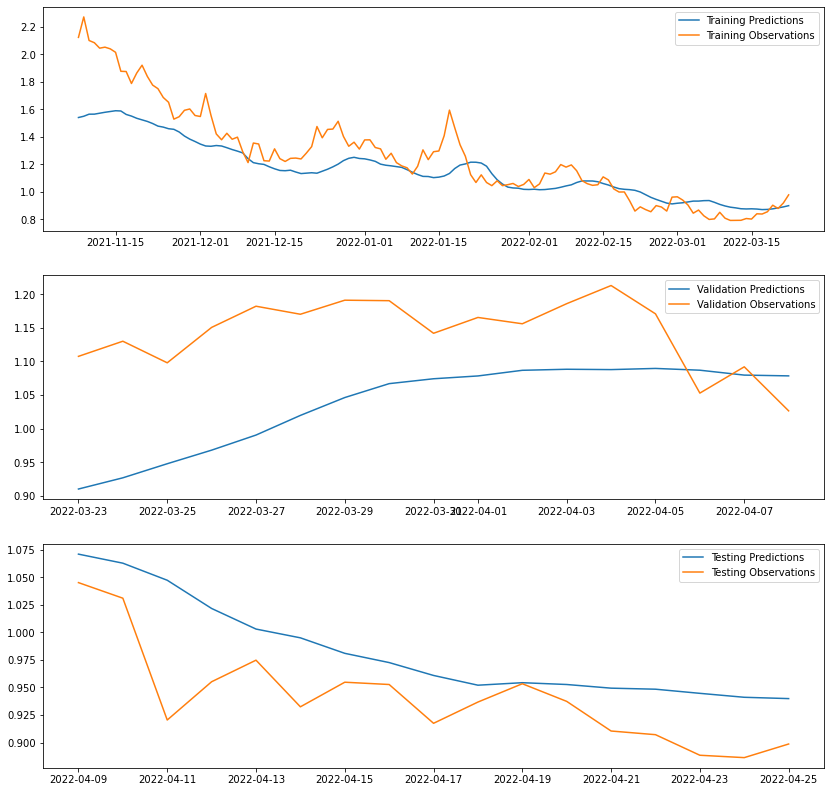

In [21]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## <font color='#5D6D7E'>Recursive Predictions</font> <a class="anchor" id="twentysixth-bullet"></a>
  [Back to TOC](#toc)

In [22]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

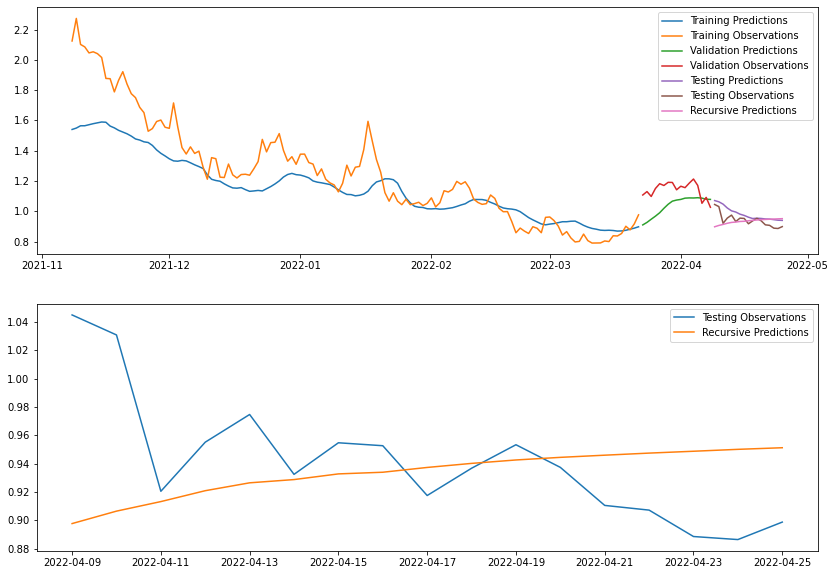

In [23]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

## <font color='#5D6D7E'>ARIMA</font> <a class="anchor" id="twentyseventh-bullet"></a>
  [Back to TOC](#toc)

In [25]:
df_complete

,Date,ADA-USD_ADJCLOSE,ADA-USD_CLOSE,ADA-USD_HIGH,ADA-USD_LOW,ADA-USD_OPEN,ADA-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-11-09,0.032053,0.032053,0.035060,0.025006,0.025160,1.871620e+07,21.505011,40.206349
1,2017-11-10,0.027119,0.027119,0.033348,0.026451,0.032219,6.766780e+06,18.806006,26.074639
2,2017-11-11,0.027437,0.027437,0.029659,0.025684,0.026891,5.532220e+06,1.990010,15.476554
3,2017-11-12,0.023977,0.023977,0.027952,0.022591,0.027480,7.280250e+06,14.609836,23.730689
4,2017-11-13,0.025808,0.025808,0.026300,0.023495,0.024364,4.419440e+06,5.595160,11.938711
...,...,...,...,...,...,...,...,...,...
1624,2022-04-21,0.910474,0.910474,0.969453,0.896912,0.937272,8.711113e+08,2.943303,8.087861
1625,2022-04-22,0.907154,0.907154,0.923741,0.893973,0.910335,7.257889e+08,0.350655,3.329853
1626,2022-04-23,0.888503,0.888503,0.910614,0.884660,0.907185,4.479977e+08,2.102638,2.933783
1627,2022-04-24,0.886350,0.886350,0.897855,0.881857,0.888279,4.876295e+08,0.217639,1.814127


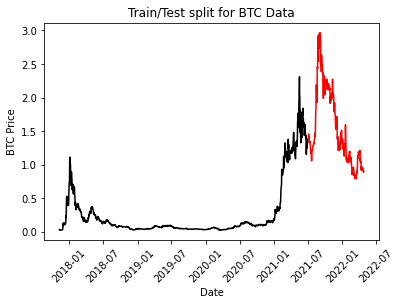

In [26]:
train = df_complete[df_complete['Date'] < "2021-07-01"][['Date','ADA-USD_CLOSE']]
test = df_complete[df_complete['Date'] > "2021-07-01"][['Date','ADA-USD_CLOSE']]

train = train.set_index('Date')
test = test.set_index('Date')

plt.plot(train['ADA-USD_CLOSE'], color = "black")
plt.plot(test['ADA-USD_CLOSE'], color = "red")
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for BTC Data")
plt.show()

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = train
ARMAmodel = SARIMAX(y, order = (2, 0, 2))#, seasonal_order=(2,2,2,12))
ARMAmodel = ARMAmodel.fit()

C:\Users\beatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\beatr\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [28]:
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

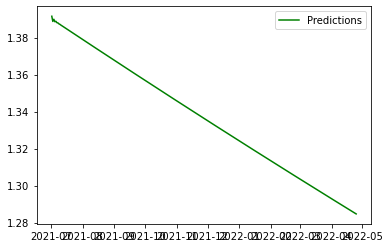

In [29]:
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

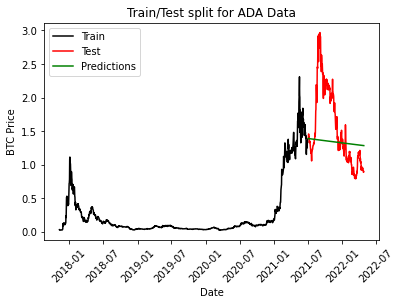

In [30]:
plt.plot(train, color = "black", label = 'Train')
plt.plot(test, color = "red", label = 'Test')
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('BTC Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for ADA Data")
plt.legend()
plt.show()

In [31]:
# FUNCTION TO EVALUATE A GIVEN ARIMA MODEL AND RETURN THE MSE VALUE
def evaluate_model(train, test, order):
    
    y = train
    ARMAmodel = SARIMAX(y, order = order)#, seasonal_order=(2,2,2,12))
    ARMAmodel = ARMAmodel.fit()
    
    y_pred = ARMAmodel.get_forecast(len(test.index))
    y_pred_df = y_pred.conf_int(alpha = 0.05) 
    y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
    y_pred_df.index = test.index
    y_pred_out = y_pred_df["Predictions"] 
    
    arma_mse = mean_squared_error(test["ADA-USD_CLOSE"].values, y_pred_df["Predictions"])
    
    return arma_mse


# ITERATE THROUGHOUT THE VARIOUS ARIMA PARAMETERS AND RETURN THE COMBINATION WITH THE LOWEST MSE SCORE
def search_parameters(dataset, p_values, d_values, q_values):
    
    train = df_complete[df_complete['Date'] < "2021-07-01"][['Date','ADA-USD_CLOSE']]
    test = df_complete[df_complete['Date'] > "2021-07-01"][['Date','ADA-USD_CLOSE']]

    train = train.set_index('Date')
    test = test.set_index('Date')

    best_score, best_cfg = float("inf"), None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_model(train, test, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))
    
    
    
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
search_parameters(df_complete["ADA-USD_CLOSE"].values, p_values, d_values, q_values)
 

ARIMA(0, 0, 0) MSE=2.743
ARIMA(0, 0, 1) MSE=2.738
ARIMA(0, 0, 2) MSE=2.734
ARIMA(0, 1, 0) MSE=0.357
ARIMA(0, 1, 1) MSE=0.357
ARIMA(0, 1, 2) MSE=0.355
ARIMA(0, 2, 0) MSE=7.252
ARIMA(0, 2, 1) MSE=0.409
ARIMA(0, 2, 2) MSE=0.456
ARIMA(1, 0, 0) MSE=0.364
ARIMA(1, 0, 1) MSE=0.432
ARIMA(1, 0, 2) MSE=0.370
ARIMA(1, 1, 0) MSE=0.357
ARIMA(1, 1, 1) MSE=0.356
ARIMA(1, 1, 2) MSE=0.354
ARIMA(1, 2, 0) MSE=20.813
ARIMA(1, 2, 1) MSE=0.471
ARIMA(1, 2, 2) MSE=0.460
ARIMA(2, 0, 0) MSE=0.426
ARIMA(2, 0, 1) MSE=0.432
ARIMA(2, 0, 2) MSE=0.354
ARIMA(2, 1, 0) MSE=0.354
ARIMA(2, 1, 1) MSE=0.355
ARIMA(2, 1, 2) MSE=0.354
ARIMA(2, 2, 0) MSE=16.761
ARIMA(2, 2, 1) MSE=0.407
ARIMA(2, 2, 2) MSE=0.438
ARIMA(4, 0, 0) MSE=0.430
ARIMA(4, 0, 1) MSE=0.354
ARIMA(4, 0, 2) MSE=0.355
ARIMA(4, 1, 0) MSE=0.357
ARIMA(4, 1, 1) MSE=0.357
ARIMA(4, 1, 2) MSE=0.360
ARIMA(4, 2, 0) MSE=23.660
ARIMA(4, 2, 1) MSE=0.477
ARIMA(4, 2, 2) MSE=0.549
ARIMA(6, 0, 0) MSE=0.995
ARIMA(6, 0, 1) MSE=0.361
ARIMA(6, 0, 2) MSE=0.589
ARIMA(6, 1, 0) MSE=0.3